<a href="https://colab.research.google.com/github/csilv7/Machine_Learning_Python/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código do Relatório Final da Disciplina Mineração de Dados do Período 2024.1.


## 1. Importação e Pré-processamento
## 2. Separação do Conjunto de Dados em Treino e Teste
## 3. Análise Exploratória
### 3.1. Medidas Estatísticas: Sumário Estatístico
### 3.2. Análise Gráfica
## 4. Classificação
### 4.1. Treinamento
### 4.2. Treinamento
## 5. Teste
## 6. Avaliação & Conclusão

In [ ]:
# Importação e Pré-processamento
import numpy as np
import pandas as pd

# Análise Exploratória
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Separação do Conjunto de Dados
from sklearn.model_selection import train_test_split

# Classificação: Treinamento e Teste
from sklearn.tree import DecisionTreeClassifier # Árvore de Decisão
from sklearn.neighbors import KNeighborsClassifier # kNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier # Redes Neurais
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # Métodos de Assembleia

# Avaliação
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix as cm

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from itertools import product
#import random

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


## Importação & Pré-processamento

### Importação do dataset

In [ ]:
# Conectando o código ao meus arquivos que estão no drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando o arquivo direto do drive
path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Projeto Final/loan_data.csv'
dataset = pd.read_csv(path)
dataset

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0             360.0   
1               3000                0.0        66.0             360.0   
2               2583             2358.0       120.0             360.0   
3               6000                0.0       141.0             360.0   
4               2333             1516.0        95.0             360.0   
..               ...                ...         ...               ...   
376             5703                0.0       128.0             360.0   
377             3232             1950.0       108.0             360.0   
378             2900                0.0        71.0             360.0   
379             4106                0.0        40.0             180.0   
380             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Rural           N  
1               1.0         Urban           Y  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
376             1.0         Urban           Y  
377             1.0         Rural           Y  
378             1.0         Rural           Y  
379             1.0         Rural           Y  
380             0.0     Semiurban           N  

[381 rows x 13 columns]

### Pré-processamento: Exploração & Transformações no dataset

In [ ]:
# Criando uma cópia para manipulações sem alterar o dataset original
loan_data = dataset.drop(columns='Loan_ID')

# Informação sobre a estrutura do dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [ ]:
loan_data.isnull().sum() # Verificando quantos NAN's têm por coluna

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
columns = ['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History'] # Colunas com NAN's
for column in columns:
  loan_data[column] = loan_data[column].fillna(loan_data[column].mode().iloc[0]) # Substituindo os NAN's pela moda

loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [ ]:
loan_data['ApplicantIncome'] = loan_data['ApplicantIncome'].astype('float')
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype('int')
loan_data['Credit_History'] = loan_data['Credit_History'].map({0:'No', 1:'Yes'})

In [ ]:
from sklearn.preprocessing import StandardScaler

loan_preprocessing = loan_data.copy()
scaler = StandardScaler() # Inicialize o StandardScaler
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for column in columns:
  loan_preprocessing[column] = scaler.fit_transform(loan_preprocessing[column].values.reshape(-1, 1))

In [ ]:
for column in loan_preprocessing.columns:
  if loan_preprocessing[column].dtype == 'object':
    print(f'Número de valores únicos da coluna {column}: {loan_preprocessing[column].nunique()}')
    print(f'Valores únicos da coluna {column}: {loan_preprocessing[column].unique()}')
    print('--'*39)

Número de valores únicos da coluna Gender: 2
Valores únicos da coluna Gender: ['Male' 'Female']
------------------------------------------------------------------------------
Número de valores únicos da coluna Married: 2
Valores únicos da coluna Married: ['Yes' 'No']
------------------------------------------------------------------------------
Número de valores únicos da coluna Dependents: 4
Valores únicos da coluna Dependents: ['1' '0' '2' '3+']
------------------------------------------------------------------------------
Número de valores únicos da coluna Education: 2
Valores únicos da coluna Education: ['Graduate' 'Not Graduate']
------------------------------------------------------------------------------
Número de valores únicos da coluna Self_Employed: 2
Valores únicos da coluna Self_Employed: ['No' 'Yes']
------------------------------------------------------------------------------
Número de valores únicos da coluna Credit_History: 2
Valores únicos da coluna Credit_History: 

In [ ]:
class_maping = {'0':0, '1':1, '2':2, '3+':3}

loan_preprocessing['Dependents'] = loan_preprocessing['Dependents'].map(class_maping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder() # Inicializar o codificador de rótulos

# Iterar sobre as colunas categóricas e transformá-las em numéricas
for column in loan_data.columns:
  if loan_preprocessing[column].dtype == 'object':
    loan_preprocessing[column] = LabelEncoder.fit_transform(loan_preprocessing[column])

# Exibir o DataFrame após a transformação
loan_preprocessing.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           1          0              0         0.707469   
1       1        1           0          0              1        -0.408932   
2       1        1           0          1              0        -0.703019   
3       1        0           0          0              0         1.706799   
4       1        1           0          1              0        -0.879330   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.098695    0.812575          0.275147               1   
1          -0.546371   -1.376596          0.275147               1   
2           0.462294    0.530102          0.275147               1   
3          -0.546371    1.271595          0.275147               1   
4           0.102118   -0.352629          0.275147               1   

   Property_Area  Loan_Status  
0              0            0  
1              2            1  
2              2            1  
3              2            1  
4              2            1

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    float64
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    int64  
 9   Credit_History     381 non-null    object 
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 35.8+ KB


In [ ]:
loan_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    float64
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    int64  
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 35.8 KB


## Análise de Exploratória dos Dados

### Medidas Estatísticas

In [ ]:
loan_data.describe().T

count         mean          std    min     25%     50%  \
ApplicantIncome    381.0  3579.845144  1419.813818  150.0  2600.0  3333.0   
CoapplicantIncome  381.0  1277.275381  2340.818114    0.0     0.0   983.0   
LoanAmount         381.0   104.986877    28.358464    9.0    90.0   110.0   
Loan_Amount_Term   381.0   341.417323    67.625957   12.0   360.0   360.0   

                      75%      max  
ApplicantIncome    4288.0   9703.0  
CoapplicantIncome  2016.0  33837.0  
LoanAmount          127.0    150.0  
Loan_Amount_Term    360.0    480.0

In [ ]:
object_describe = loan_data.describe(include='object').T
object_describe['relative (%)'] = [round((object_describe['freq'].iloc[i] / 381) * 100, 2) for i in range(len(object_describe))]
object_describe

count unique        top freq  relative (%)
Gender           381      2       Male  296         77.69
Married          381      2        Yes  228         59.84
Dependents       381      4          0  242         63.52
Education        381      2   Graduate  278         72.97
Self_Employed    381      2         No  346         90.81
Credit_History   381      2        Yes  324         85.04
Property_Area    381      3  Semiurban  149         39.11
Loan_Status      381      2          Y  271         71.13

### Análise gráfica

#### Histograma

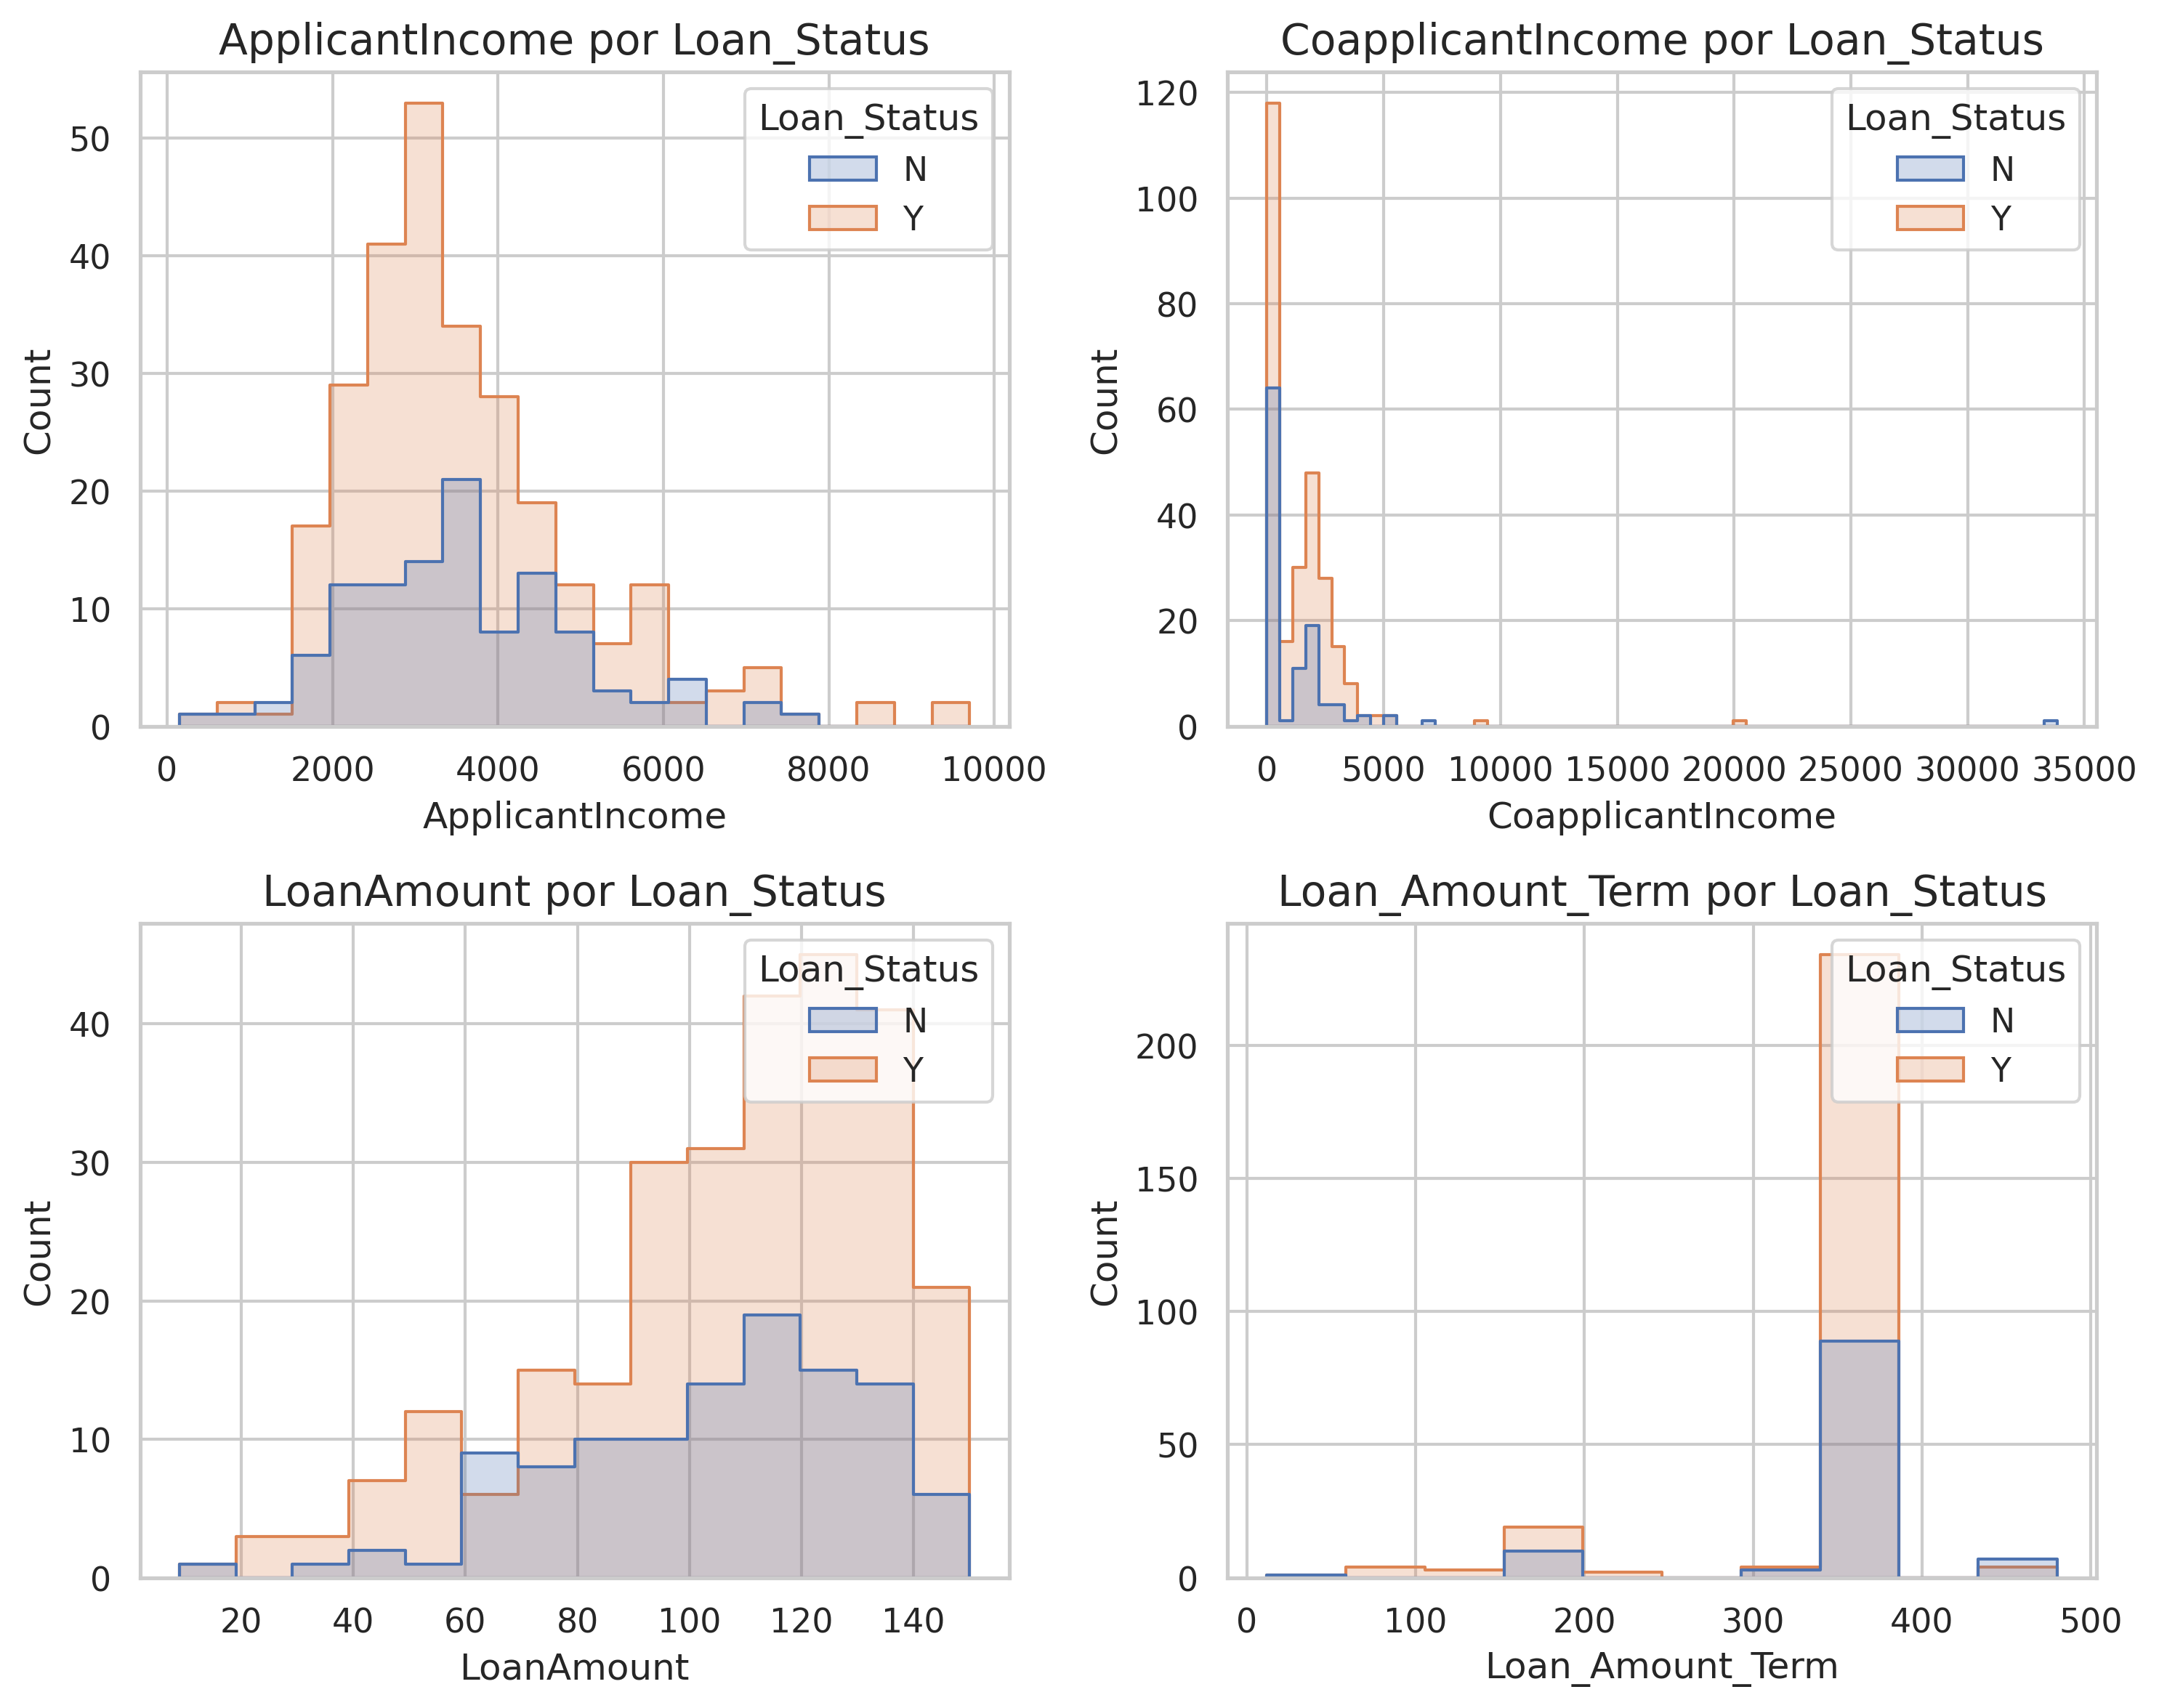

In [ ]:
plt.figure(figsize=(10, 8), dpi=300)

i = 1
for column in loan_data.columns:
    if (loan_data[column].dtype == 'float64') or (loan_data[column].dtype == 'int64'):
        plt.subplot(2, 2, i)
        ax = sns.histplot(data=loan_data, x=column, hue='Loan_Status', element='step')
        ax.set_title(f'{column} por Loan_Status', fontsize=14)
        i += 1
plt.tight_layout()
plt.savefig('histograma.pdf', format='pdf', dpi=300)
plt.show()

#### BoxPlot

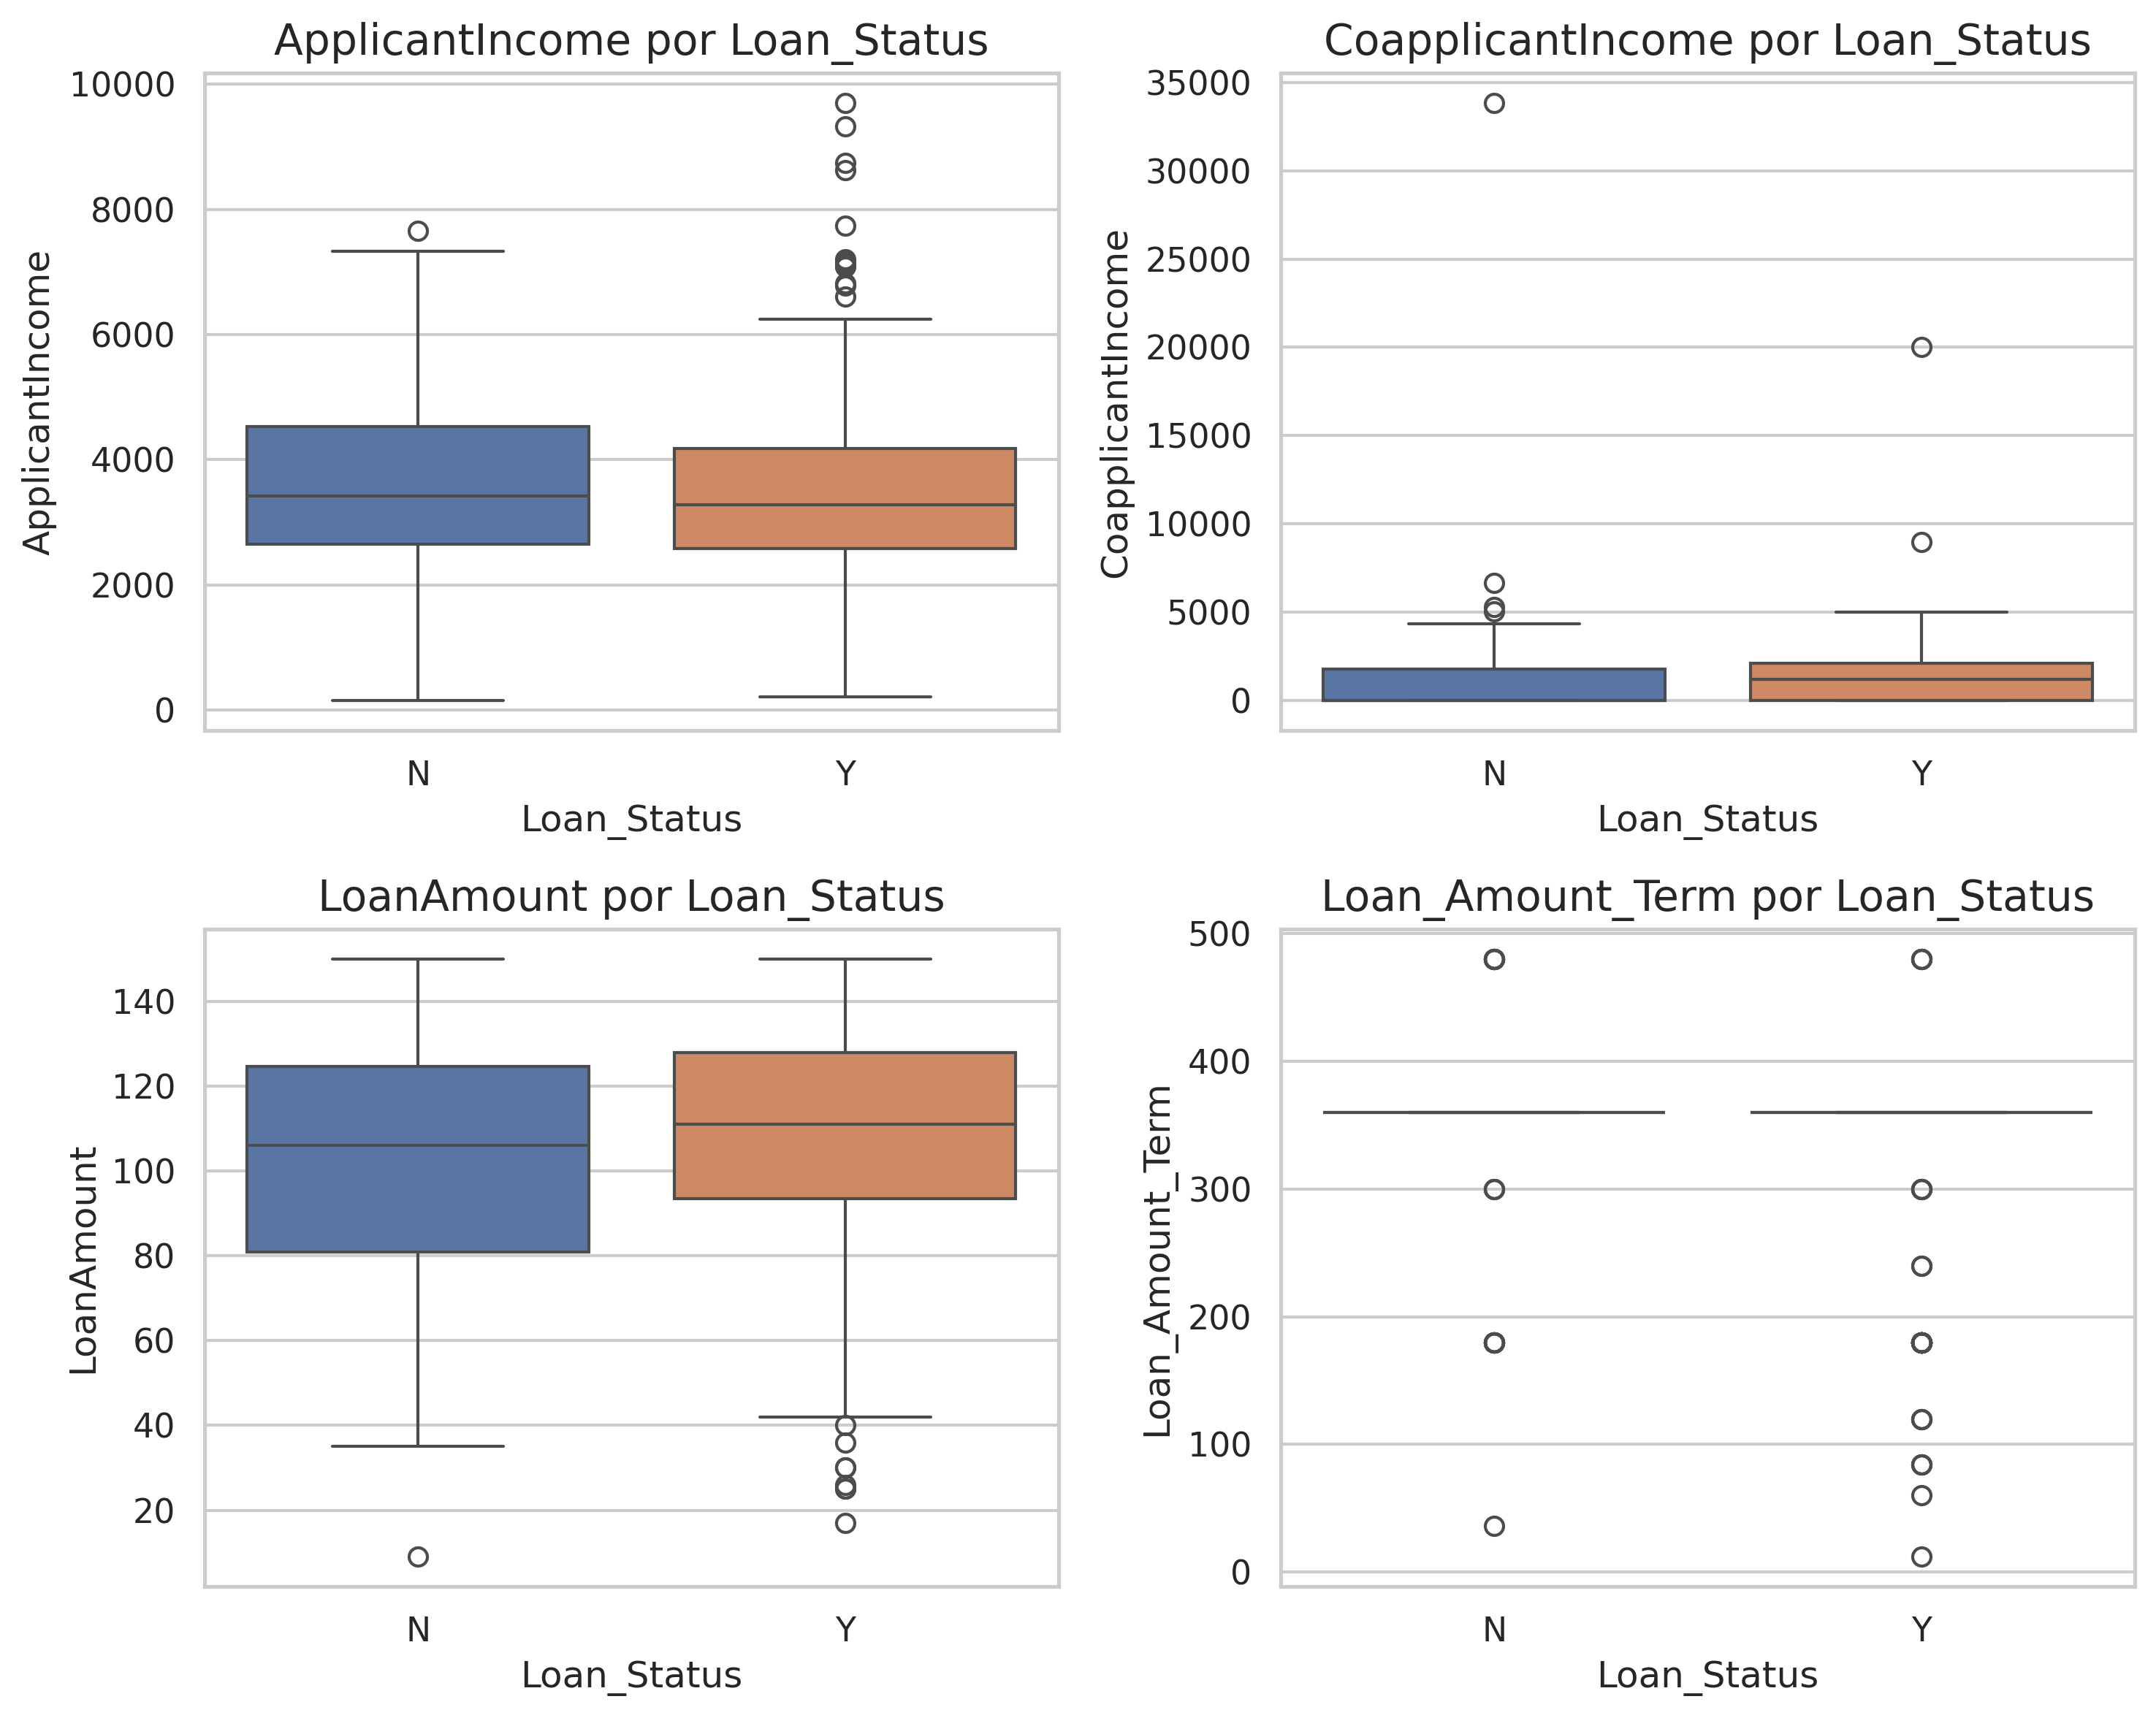

In [ ]:
plt.figure(figsize=(10, 8), dpi=300)

i = 1
for column in loan_data.columns:
    if (loan_data[column].dtype == 'float64') or (loan_data[column].dtype == 'int64'):
        plt.subplot(2, 2, i)
        ax = sns.boxplot(data=loan_data, y=column, x='Loan_Status', hue='Loan_Status')
        ax.set_title(f'{column} por Loan_Status', fontsize=14)
        i += 1

plt.tight_layout()
plt.savefig('boxplot.pdf', format='pdf', dpi=300)
plt.show()

#### CountPlot ou BarPlot

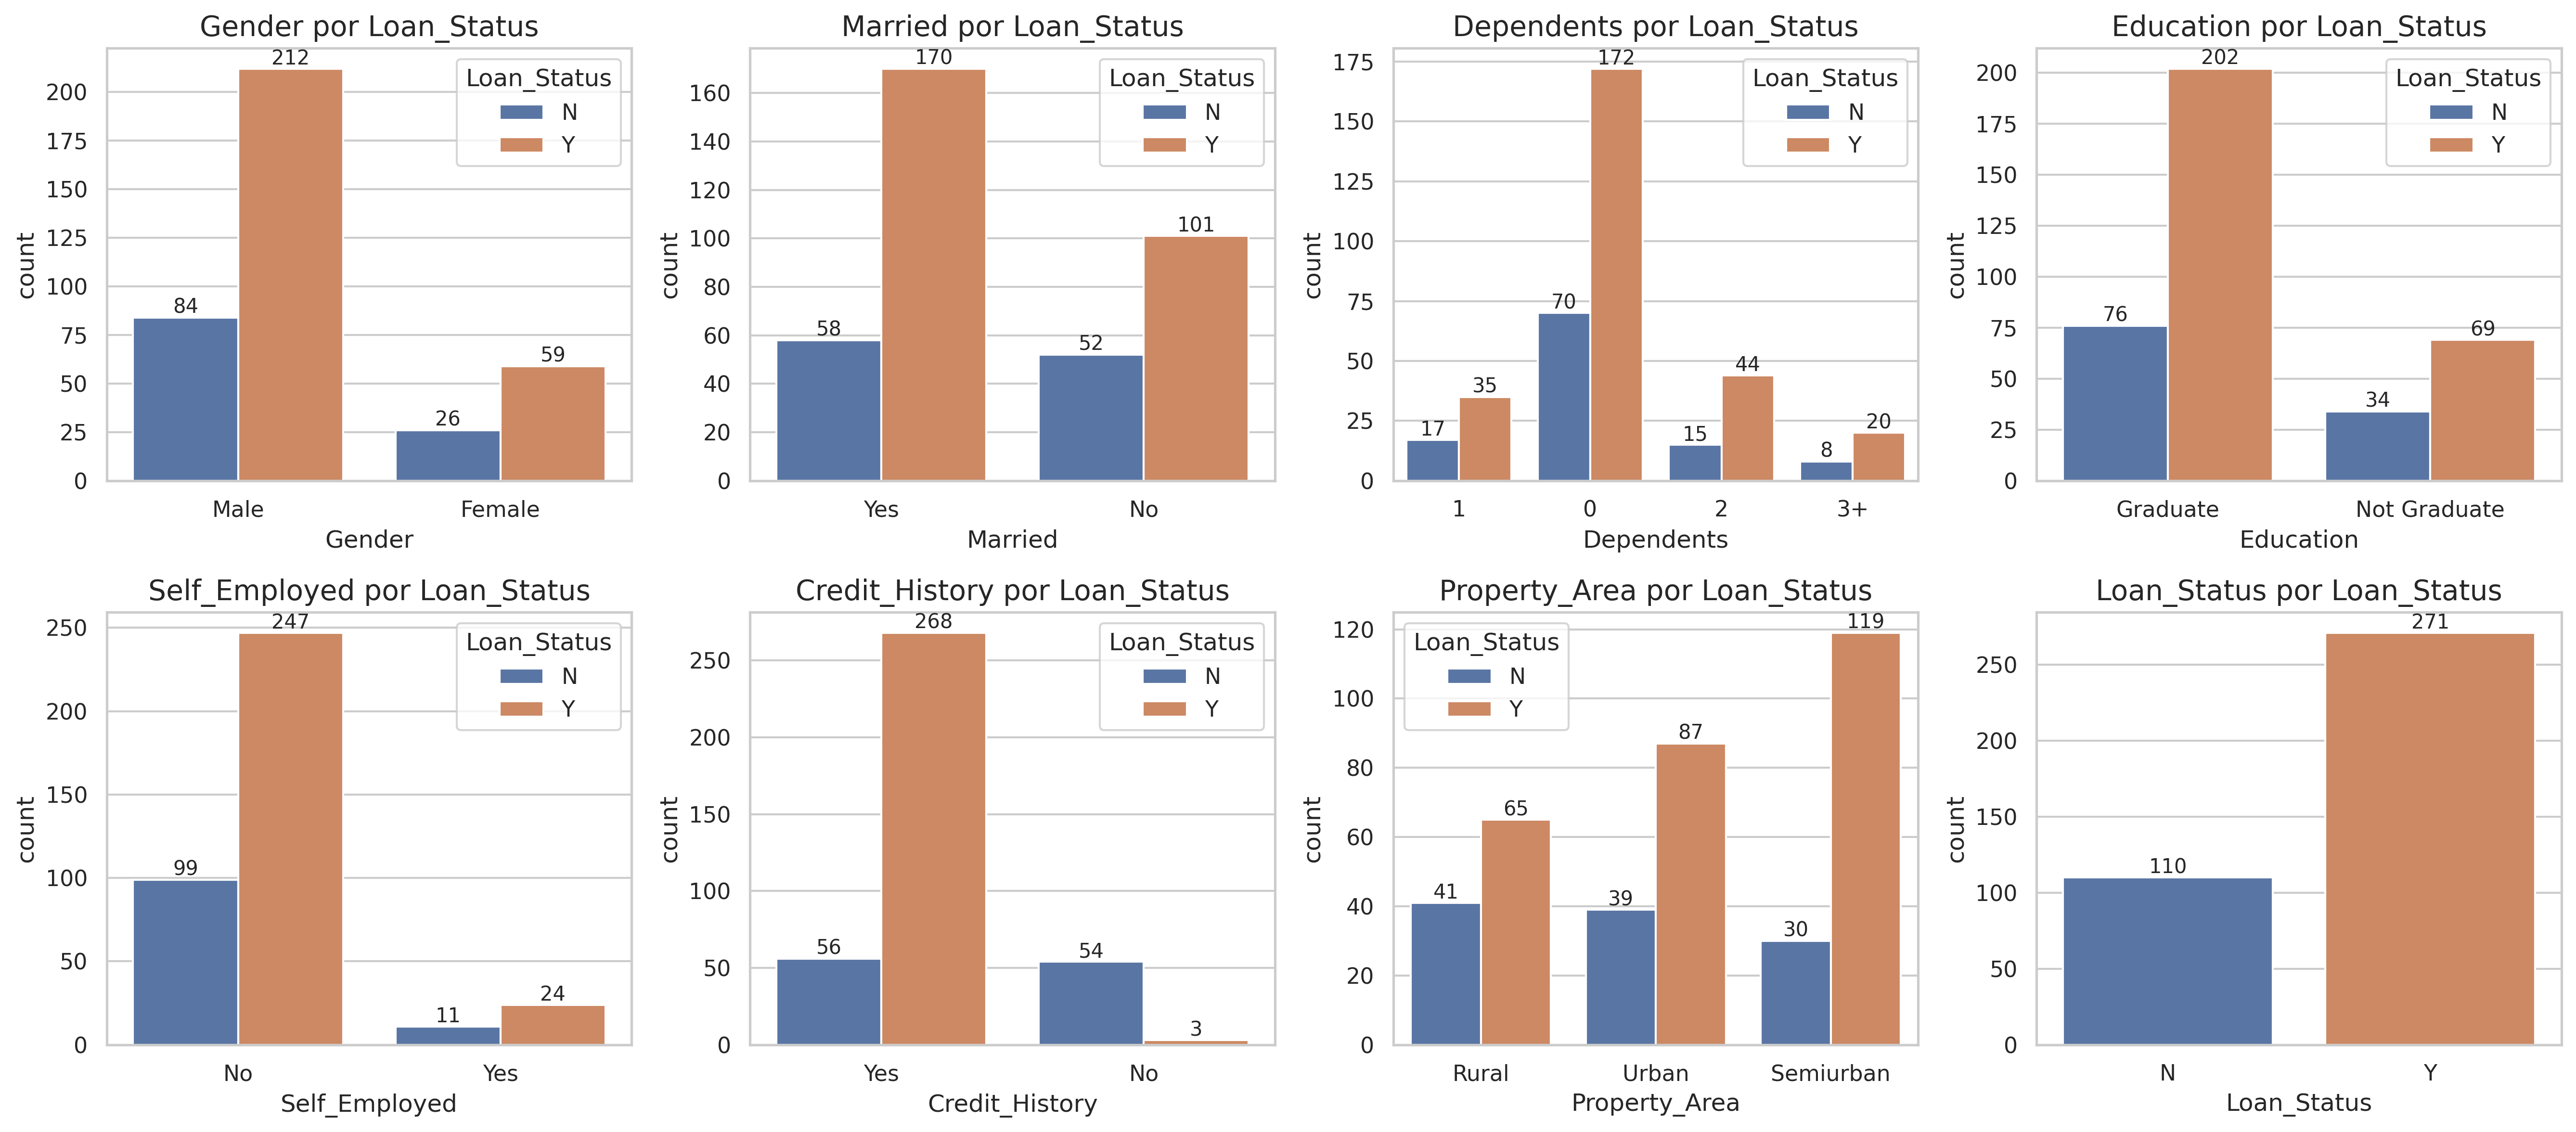

In [ ]:
plt.figure(figsize=(18, 8), dpi=300)

i = 1
for column in loan_data.columns:
    if loan_data[column].dtype == 'object':
        plt.subplot(2, 4, i)
        ax = sns.countplot(data=loan_data, x=column, hue='Loan_Status')
        ax.set_title(f'{column} por Loan_Status', fontsize=14)
        for num in [0, 1]:
          ax.bar_label(ax.containers[num], fontsize=10);
        i += 1

plt.tight_layout()
plt.savefig('countplot.pdf', format='pdf', dpi=300)
plt.show()

#### Matriz de Correlação

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
correlation =  loan_preprocessing.corr(method='spearman')

# Plot da matriz de correlação
sns.heatmap(correlation, annot=True, fmt=".2f", linewidths=1.0)

# Ajustar a margem para permitir espaço extra para os rótulos do eixo x
plt.tight_layout()

# Salvar o gráfico em PDF com margens ajustadas
plt.savefig('spearman.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

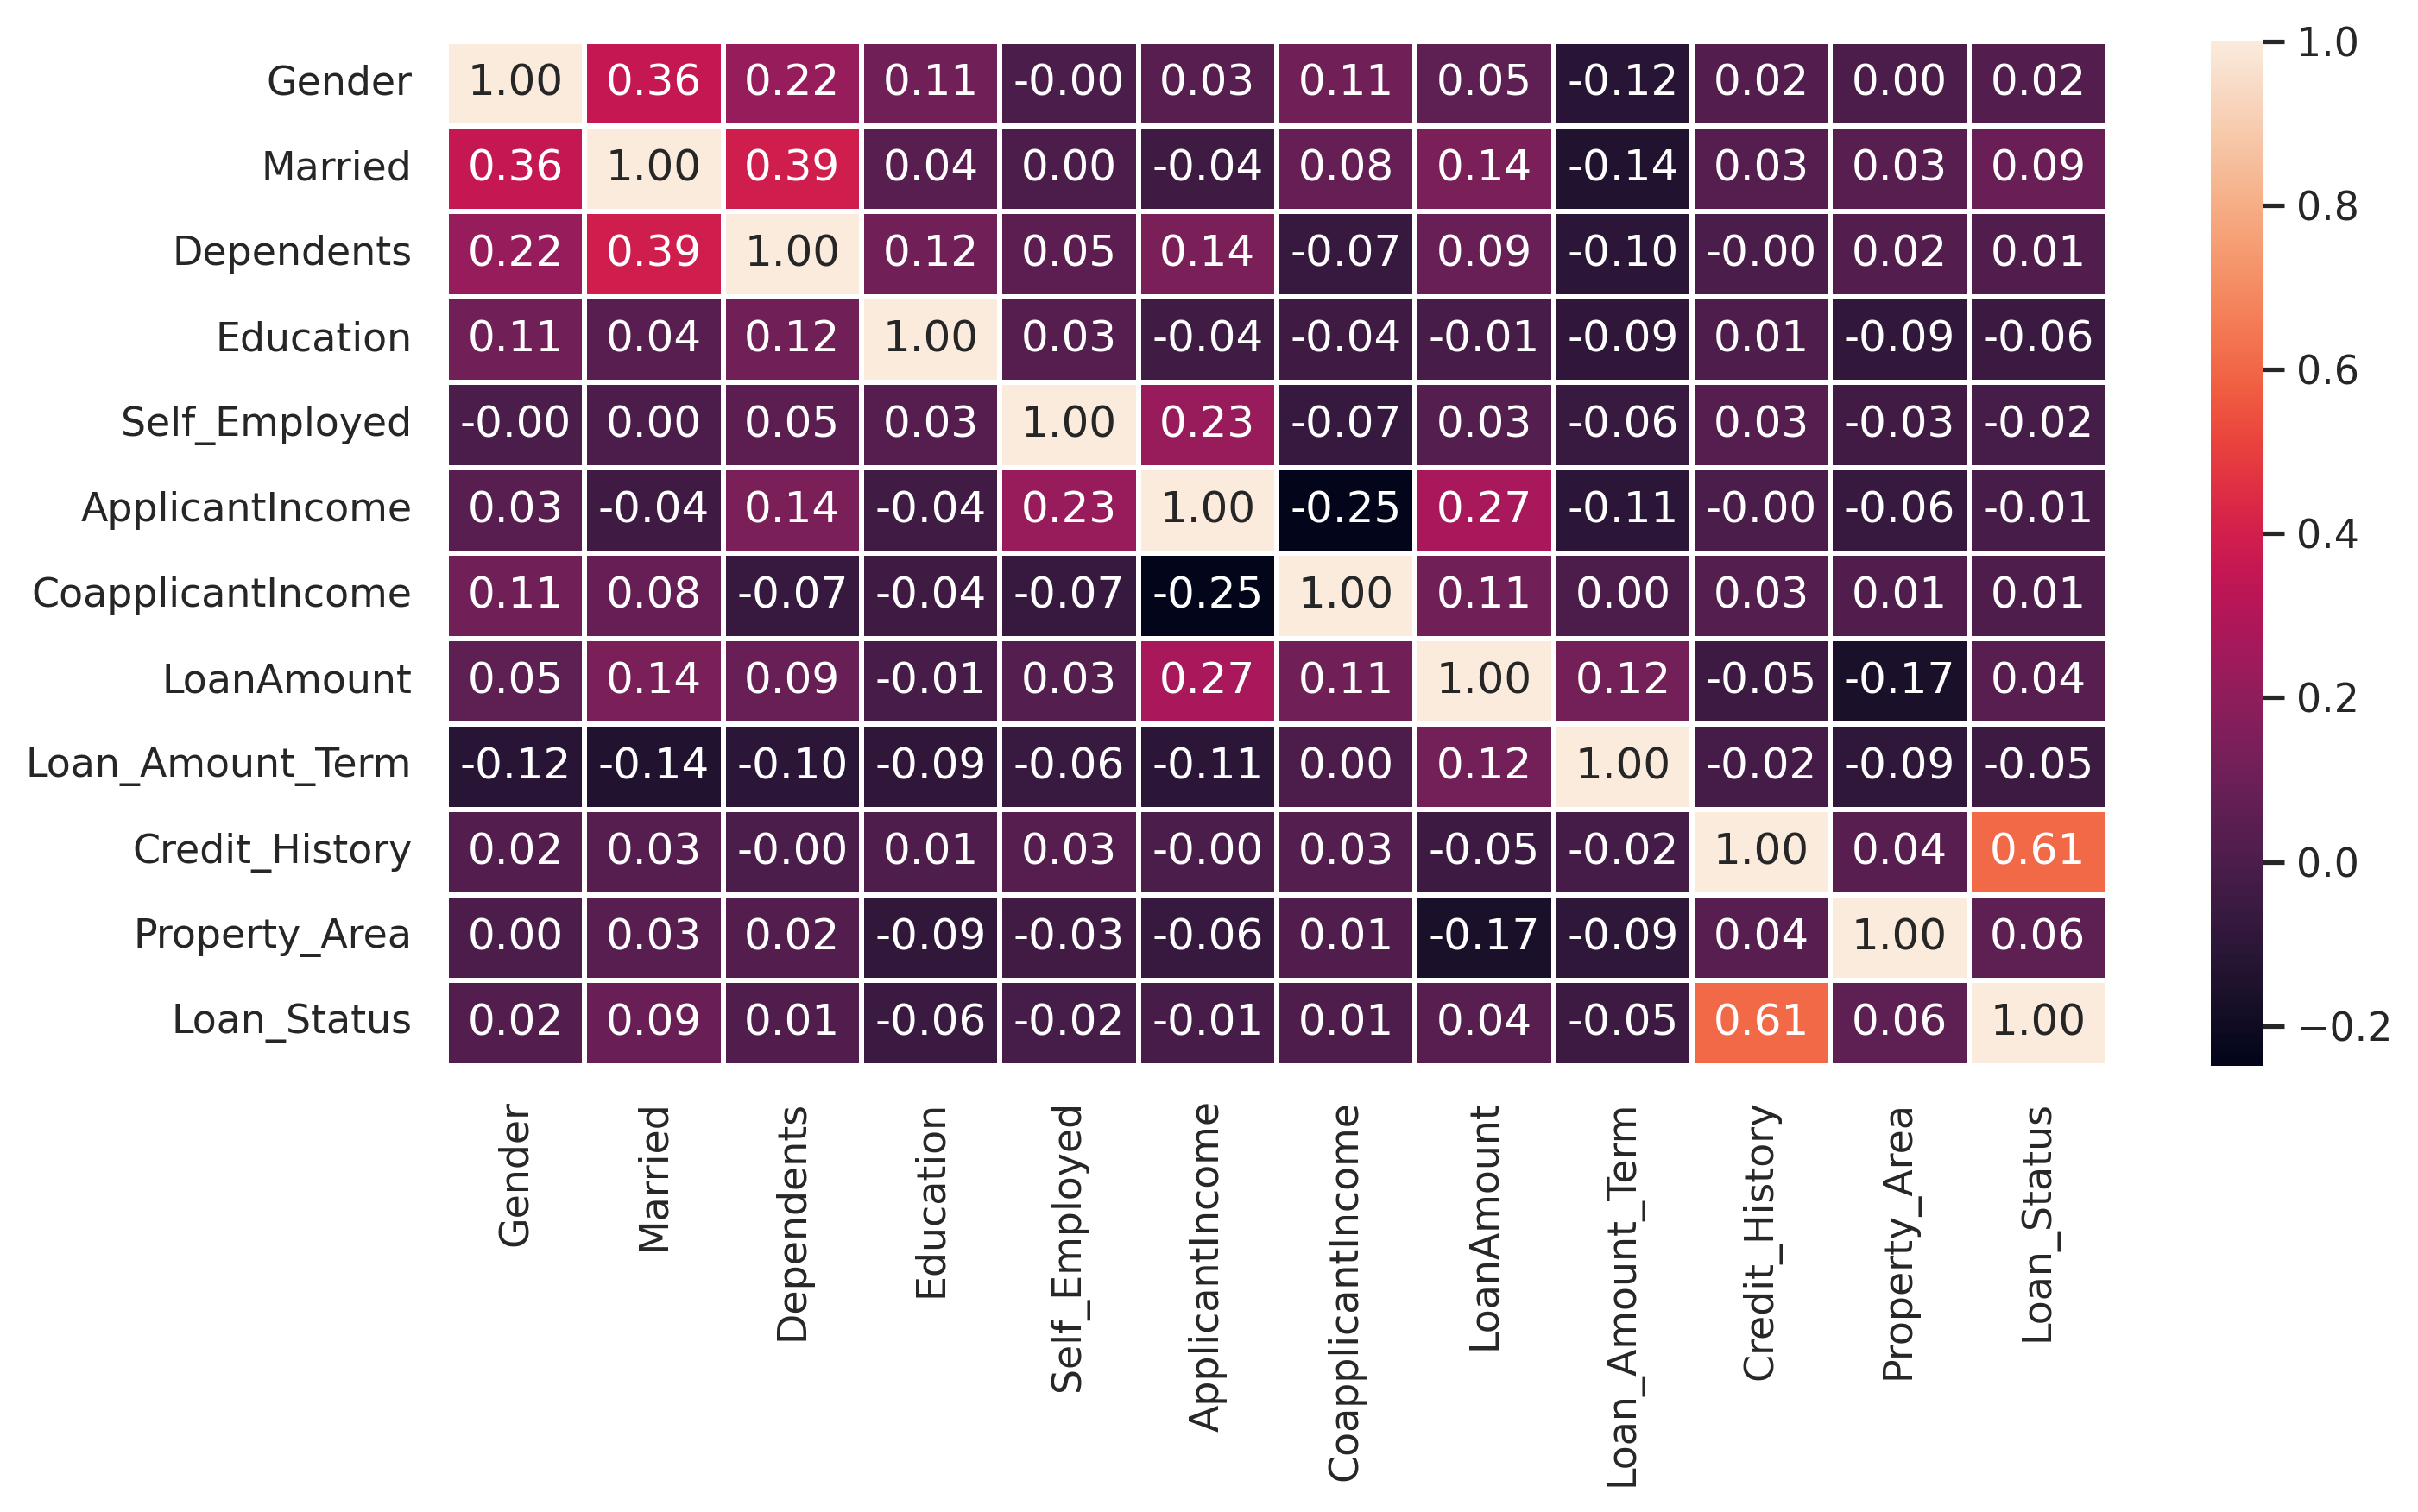

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
correlation =  loan_preprocessing.corr()

# Plot da matriz de correlação
sns.heatmap(correlation, annot=True, fmt=".2f", linewidths=1.0)

# Ajustar a margem para permitir espaço extra para os rótulos do eixo x
plt.tight_layout()

# Salvar o gráfico em PDF com margens ajustadas
plt.savefig('pearson.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

#### Matriz de Diagramas de Dispersão

<Figure size 3600x1800 with 0 Axes>

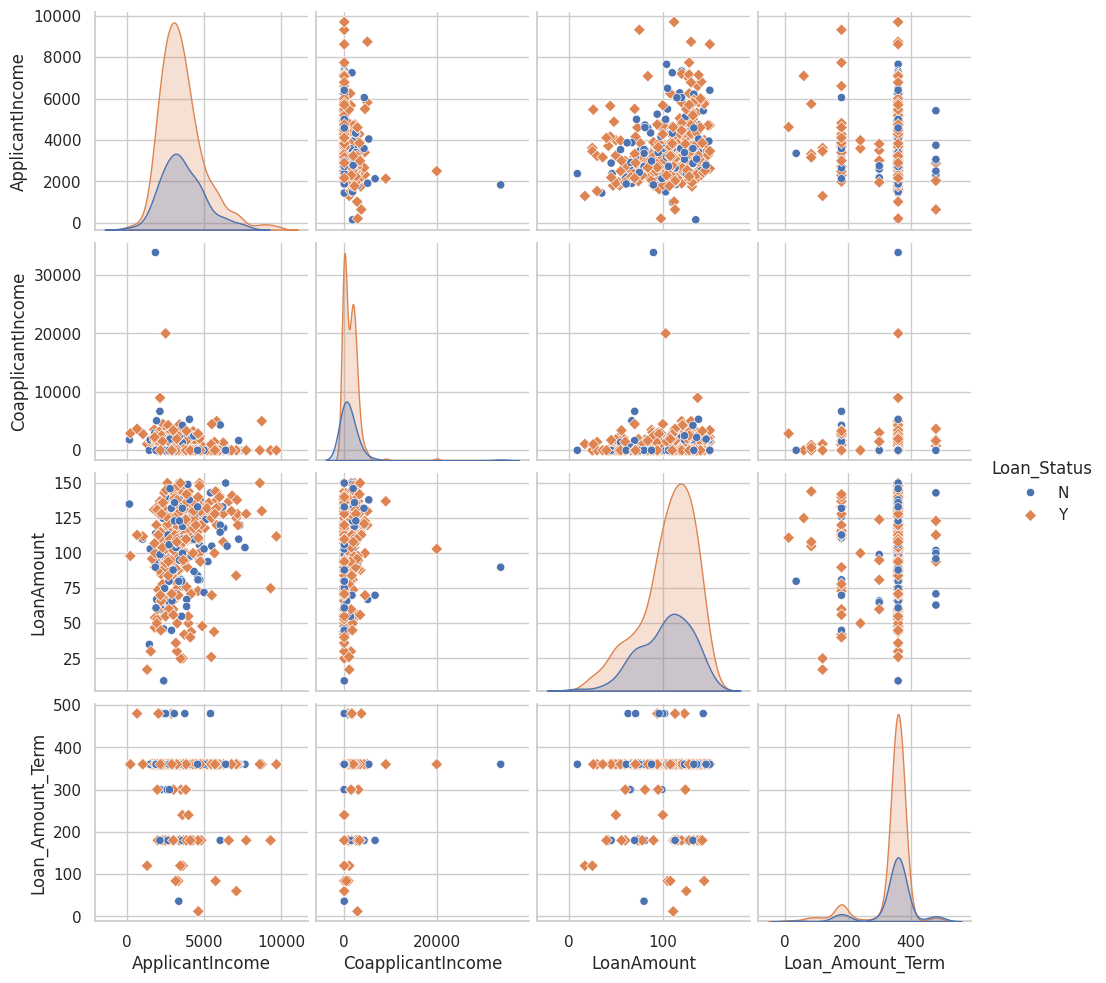

In [ ]:
plt.figure(figsize=(12, 6), dpi=300)

sns.pairplot(loan_data, hue='Loan_Status', markers=['o', 'D'])

plt.savefig('pairplot.pdf', format='pdf', dpi=300)
plt.show()

## Separação do Conjunto de Dados em Treino e Teste

In [ ]:
size_train = 0.8 # tamanho do conjunto de treino
seed = 16 # semente

In [ ]:
X = loan_preprocessing.drop(columns='Loan_Status') # Matriz de Atributos
y = loan_preprocessing['Loan_Status'] # Coluna Alvo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = size_train,
                                                    random_state = seed)

## Classificação

### Treinamento

#### Modelos Iniciais

In [ ]:
# Árvore de Decisão (Decision Tree)
# Criação e inicialização do modelo
first_tree = DecisionTreeClassifier(random_state = seed)

# Ajuste (Treinamento)
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=16)

In [ ]:
# kNN (kNeighbors)
# Criação e inicialização do modelo
first_kNN = KNeighborsClassifier()

# Ajuste (Treinamento)
first_kNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Naive Bayes Gaussiano (GaussianNB)
# Criação e inicialização do modelo
first_gnb = GaussianNB(var_smoothing = 1e-5)

# Ajuste (Treinamento)
first_gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-05)

In [ ]:
# Regrssão Logística ()
# Criação e inicialização do modelo
first_lg = LogisticRegression(tol = 1e-5, random_state = seed)

# Ajuste (Treinamento)
first_lg.fit(X_train, y_train)

LogisticRegression(random_state=16, tol=1e-05)

In [ ]:
# Redes Neurais (NeuralNetworks)
# Criação e inicialização do modelo
first_mlp = MLPClassifier(alpha = 1e-5, random_state = seed)
# Ajuste (Treinamento)
first_mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, random_state=16)

In [ ]:
# SVM (Support Vector Machine)
# Criação e inicialização do modelo
first_svm = SVC(tol = 1e-5, random_state = seed)

# Ajuste (Treinamento)
first_svm.fit(X_train, y_train)

SVC(random_state=16, tol=1e-05)

In [ ]:
# Métodos de Assembleia (Methods in Assembly) # Método de classificação RandomForest (Florestas Aleatórias)
# Criação e inicialização do modelo
first_randomforest = RandomForestClassifier(random_state = seed)

# Ajuste (Treinamento)
first_randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=16)

In [ ]:
# Métodos de Assembleia (Methods in Assembly) # Método de classificação VotingClassifier
# Criação e inicialização do modelo
classifiers = [('DecisionTre', first_tree), ('kNN', first_kNN), ('GaussianNB', first_gnb),
               ('LogisticRegression', first_lg), ('NeuralNetworks', first_mlp),
               ('SVM', first_svm), ('RandomForest', first_randomforest)]
first_voting = VotingClassifier(estimators = classifiers)

# Ajuste (Treinamento)
first_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('DecisionTre',
                              DecisionTreeClassifier(random_state=16)),
                             ('kNN', KNeighborsClassifier()),
                             ('GaussianNB', GaussianNB(var_smoothing=1e-05)),
                             ('LogisticRegression',
                              LogisticRegression(random_state=16, tol=1e-05)),
                             ('NeuralNetworks',
                              MLPClassifier(alpha=1e-05, random_state=16)),
                             ('SVM', SVC(random_state=16, tol=1e-05)),
                             ('RandomForest',
                              RandomForestClassifier(random_state=16))])

#### Variação de HiperParâmetros

In [ ]:
# Variação dos Hiper Parâmetros do classificador de Árvore de Decisão
# Definir os valores/intervalos para cada parâmetro
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2', None]

# Criar a lista de todas as combinações possíveis
parameters = list(product(criterion, splitter, max_features))

accuracy_list = []
for param in parameters:
    tree = DecisionTreeClassifier(criterion=param[0],
                                  splitter=param[1],
                                  max_features=param[2],
                                  random_state=seed)
    tree.fit(X_train, y_train)
    predict = tree.predict(X_test)
    accuracy = accuracy_score(predict, y_test) * 100
    accuracy_list.append(accuracy)


# Classificar as acurácias em ordem decrescente
sorted_acuracy = pd.Series(data=accuracy_list).sort_values(ascending=False)

# Obter a melhor acurácia e seus parâmetros correspondentes
best_acuracy = sorted_acuracy.iloc[0]
best_parameters_tree = parameters[sorted_acuracy.index[0]]

# Exibir resultados
print(f'O conjunto de parâmetros com maior acurácia ({best_acuracy:.2f}%) foi:\n{best_parameters_tree}')

O conjunto de parâmetros com maior acurácia (92.21%) foi:
('log_loss', 'random', None)


In [ ]:
# Variação dos Hiper Parâmetros do classificador de kNN
# Definir os valores/intervalos para cada parâmetro
n_neighbors = range(3, 11)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = range(10, 101, 10)
metric = ['euclidean', 'manhattan', 'minkowski']

# Criar a lista de todas as combinações possíveis
parameters = list(product(n_neighbors, weights, algorithm, leaf_size, metric))

# Listas das acurácias obtidas das amostras
accuracy_list = []
for param in parameters:
  kNN = KNeighborsClassifier(n_neighbors=param[0],
                             weights=param[1],
                             algorithm=param[2],
                             leaf_size=param[3],
                             metric=param[4])
  kNN.fit(X_train, y_train)
  predict = kNN.predict(X_test)
  accuracy = accuracy_score(predict, y_test) * 100
  accuracy_list.append(accuracy)

# Classificar as acurácias em ordem decrescente
sorted_acuracy = pd.Series(data=accuracy_list).sort_values(ascending=False)

# Obter a melhor acurácia e seus parâmetros correspondentes
best_acuracy = sorted_acuracy.iloc[0]
best_parameters_kNN = parameters[sorted_acuracy.index[0]]

# Exibir resultados
print(f'O conjunto de parâmetros com maior acurácia ({best_acuracy:.2f}%) foi:\n{best_parameters_kNN}')

O conjunto de parâmetros com maior acurácia (87.01%) foi:
(6, 'uniform', 'kd_tree', 10, 'manhattan')


In [ ]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
max_iter = range(100, 1001, 100)
class_weight = ['balanced', None]

# Criar a lista de todas as combinações possíveis
parameters = list(product(C, solver, max_iter, class_weight))

accuracy_list = []
for param in parameters:
    lg = LogisticRegression(C=param[0],
                            solver=param[1],
                            max_iter=param[2],
                            class_weight=param[3],
                            tol=1e-5, random_state=seed)
    lg.fit(X_train, y_train)
    predict = lg.predict(X_test)
    accuracy = accuracy_score(predict, y_test) * 100
    accuracy_list.append(accuracy)

# Classificar as acurácias em ordem decrescente
sorted_accuracy = pd.Series(data=accuracy_list).sort_values(ascending=False)

# Obter a melhor acurácia e seus parâmetros correspondentes
best_accuracy = sorted_accuracy.iloc[0]
best_parameters_lg = parameters[sorted_accuracy.index[0]]

# Exibir resultados
print(f'O conjunto de parâmetros com maior acurácia ({best_accuracy:.2f}%) foi:\n{best_parameters_lg}')

O conjunto de parâmetros com maior acurácia (89.61%) foi:
(100, 'saga', 1000, None)


In [ ]:
# Variação dos Hiper Parâmetros do classificador de Redes Neurais
# Definir os valores/intervalos para cada parâmetro
n = range(3, 104, 25)
m = range(1, 102, 25)
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
iter = range(250, 1001, 250)
# Criar a lista de todas as combinações possíveis
parameters = list(product(n, m, activation, solver, iter))

# Número de amostras
#n_samples = 200
# Amostras
#samples = random.sample(parameters, n_samples)

# Listas das acurácias obtidas das amostras
accuracy_list = []
for param in parameters:
    mlp = MLPClassifier(hidden_layer_sizes=(param[0], param[1]),
                        activation=param[2],
                        solver=param[3],
                        max_iter=param[4],
                        alpha=1e-5,
                        random_state=seed)
    mlp.fit(X_train, y_train)
    predict = mlp.predict(X_test)
    accuracy = accuracy_score(predict, y_test) * 100
    accuracy_list.append(accuracy)

# Classificar as acurácias em ordem decrescente
sorted_accuracy = pd.Series(data=accuracy_list).sort_values(ascending=False)

# Obter a melhor acurácia e seus parâmetros correspondentes
best_accuracy = sorted_accuracy.iloc[0]
best_parameters_mlp = parameters[sorted_accuracy.index[0]]

# Exibir resultados
print(f'O conjunto de parâmetros com maior acurácia ({best_accuracy:.2f}%) foi:\n{best_parameters_mlp}')

O conjunto de parâmetros com maior acurácia (90.91%) foi:
(3, 26, 'logistic', 'lbfgs', 750)


In [ ]:
# Variação dos Hiper Parâmetros do classificador de SVM
# Definir os valores/intervalos para cada parâmetro
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
probability = [True, False]
class_weight = ['balanced', None]

# Criar a lista de todas as combinações possíveis
parameters = list(product(kernel, gamma, probability, class_weight))

# Listas das acurácias obtidas das amostras
accuracy_list = []
for param in parameters:
  svm = SVC(kernel=param[0],
            gamma=param[1],
            probability=param[2],
            class_weight=param[3],
            tol=1e-5,
            random_state=seed)
  svm.fit(X_train, y_train)
  predict = svm.predict(X_test)
  accuracy = accuracy_score(predict, y_test) * 100
  accuracy_list.append(accuracy)


# Classificar as acurácias em ordem decrescente
sorted_acuracy = pd.Series(data=accuracy_list).sort_values(ascending=False)

# Obter a melhor acurácia e seus parâmetros correspondentes
best_acuracy = sorted_acuracy.iloc[0]
best_parameters_svm = parameters[sorted_acuracy.index[0]]

# Exibir resultados
print(f'O conjunto de parâmetros com maior acurácia ({best_acuracy:.2f}%) foi:\n{best_parameters_svm}')

O conjunto de parâmetros com maior acurácia (89.61%) foi:
('linear', 'scale', True, 'balanced')


In [ ]:
# Variação dos Hiper Parâmetros do classificador de RandomForest (Florestas Aleatórias)
# Definir os valores/intervalos para cada parâmetro
n_estimators = range(100, 1000, 100)
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['auto', 'sqrt', 'log2', None]

# Criar a lista de todas as combinações possíveis
parameters = list(product(n_estimators, criterion, max_features))

# Listas das acurácias obtidas das amostras
accuracy_list = []
for param in parameters:
  randomforest = RandomForestClassifier(n_estimators=param[0],
                                        criterion=param[1],
                                        max_features=param[2],
                                        random_state=seed)
  randomforest.fit(X_train, y_train)
  predict = randomforest.predict(X_test)
  accuracy = accuracy_score(predict, y_test) * 100
  accuracy_list.append(accuracy)

# Classificar as acurácias em ordem decrescente
sorted_acuracy = pd.Series(data=accuracy_list).sort_values(ascending=False)

# Obter a melhor acurácia e seus parâmetros correspondentes
best_acuracy = sorted_acuracy.iloc[0]
best_parameters_rf = parameters[sorted_acuracy.index[0]]

# Exibir resultados
print(f'O conjunto de parâmetros com maior acurácia ({best_acuracy:.2f}%) foi:\n{best_parameters_rf}')

O conjunto de parâmetros com maior acurácia (90.91%) foi:
(100, 'gini', 'auto')


#### Modelos Finais

In [ ]:
# Árvore de Decisão
# Criaçãoe e inicialização pós variação de parâmetro
last_tree = DecisionTreeClassifier(criterion = best_parameters_tree[0],
                                   splitter = best_parameters_tree[1],
                                   max_features = best_parameters_tree[2],
                                   random_state=seed)

# Ajuste (Treinamento)
last_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=16, splitter='random')

In [ ]:
# kNN
# Criação e inicialização pós variação do parâmetro
last_kNN = KNeighborsClassifier(n_neighbors = best_parameters_kNN[0],
                                weights = best_parameters_kNN[1],
                                algorithm = best_parameters_kNN[2],
                                leaf_size = best_parameters_kNN[3],
                                metric = best_parameters_kNN[4])

# Ajuste (Treinamento)
last_kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, metric='manhattan',
                     n_neighbors=6)

In [ ]:
# Regressão Logística
# Criação e inicialização pós variação do parâmetro
last_lg = LogisticRegression(C=best_parameters_lg[0],
                             solver=best_parameters_lg[1],
                             max_iter=best_parameters_lg[2],
                             class_weight=best_parameters_lg[3],
                             tol=1e-5, random_state=seed)

# Ajuste (Treinamento)
last_lg.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, random_state=16, solver='saga',
                   tol=1e-05)

In [ ]:
# Redes Neurais
# Criação e inicialização pós variação do parâmetro
last_mlp = MLPClassifier(hidden_layer_sizes = (best_parameters_mlp[0], best_parameters_mlp[1]),
                         activation = best_parameters_mlp[2],
                         solver = best_parameters_mlp[3],
                         max_iter = best_parameters_mlp[4],
                         alpha = 1e-5,
                         random_state=seed)

# Ajuste (Treinamento)
last_mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(3, 26),
              max_iter=750, random_state=16, solver='lbfgs')

In [ ]:
# SVM
# Criação e inicialização pós variação do parâmetro
last_svm = SVC(kernel = best_parameters_svm[0],
               gamma = best_parameters_svm[1],
               probability = best_parameters_svm[2],
               class_weight = best_parameters_svm[3],
               tol=1e-5,
               random_state=seed)

# Ajuste (Treinamento)
last_svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=16,
    tol=1e-05)

In [ ]:
# Random Forest
# Criação e inicialização pós variação do parâmetro
last_randomforest = RandomForestClassifier(n_estimators = best_parameters_rf[0],
                                           criterion = best_parameters_rf[1],
                                           max_features = best_parameters_rf[2],
                                           random_state=seed)

# Ajuste (Treinamento)
last_randomforest.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', random_state=16)

### Teste

#### Modelos Inicias

In [ ]:
# Teste dos Modelos
first_treeP = first_tree.predict(X_test) # Árvore de Decisão
first_kNNP = first_kNN.predict(X_test) # kNN
first_gnbP = first_gnb.predict(X_test) # GaussianNB
first_lgP = first_lg.predict(X_test) # Regressão Logística
first_mlpP = first_mlp.predict(X_test) # Redes Neurais
first_svmP = first_svm.predict(X_test) # SVM
first_randomforestP = first_randomforest.predict(X_test) # Assembly: RandomForest
first_votingP = first_voting.predict(X_test) # Assembly: VotingClassifier

#### Modelos Finais

In [ ]:
# Teste dos Modelos pós Variação de Parâmetros
last_treeP = last_tree.predict(X_test) # Árvore de Decisão
last_kNNP = last_kNN.predict(X_test) # kNN
last_lgP = last_lg.predict(X_test) # Regressão Logística
last_mlpP = last_mlp.predict(X_test) # Redes Neurais
last_svmP = last_svm.predict(X_test) # SVM
last_randomforestP = last_randomforest.predict(X_test) # Assembly: RandomForest

## Avaliação

#### Modelos Iniciais

In [ ]:
name_classifier = ['Fisrt DecisionTree', 'Fisrt kNN', 'Fisrt GaussianNB',
                   'Fisrt LogisticRegression', 'Fisrt NeuralNetwworks',
                   'Fisrt SVM', 'Fisrt RandomForest', 'Fisrt VotingClassifier']
predict_classifier = [first_treeP, first_kNNP, first_gnbP,
                      first_lgP, first_mlpP, first_svmP,
                      first_randomforestP, first_votingP]

for i, j in zip(name_classifier, predict_classifier):
    # Métricas do classificador
    acuracy = accuracy_score(y_test, j) * 100
    # Printa as informações
    print(f'O classificador de {i}, obteve uma acurácia (exatidão/acerto) de {round(acuracy, 2)}%')

    # Matriz de confusão
    confusion_matrix = pd.DataFrame(cm(y_test, j),
                                    columns=['N (estimado)', 'Y (estimado)'],
                                    index=['N (original)', 'Y (original)'])
    print(confusion_matrix)
    print('--' * 50)

O classificador de Fisrt DecisionTree, obteve uma acurácia (exatidão/acerto) de 84.42%
              N (estimado)  Y (estimado)
N (original)            13             6
Y (original)             6            52
----------------------------------------------------------------------------------------------------
O classificador de Fisrt kNN, obteve uma acurácia (exatidão/acerto) de 79.22%
              N (estimado)  Y (estimado)
N (original)             6            13
Y (original)             3            55
----------------------------------------------------------------------------------------------------
O classificador de Fisrt GaussianNB, obteve uma acurácia (exatidão/acerto) de 89.61%
              N (estimado)  Y (estimado)
N (original)            11             8
Y (original)             0            58
----------------------------------------------------------------------------------------------------
O classificador de Fisrt LogisticRegression, obteve uma acurácia (exatidão/ace

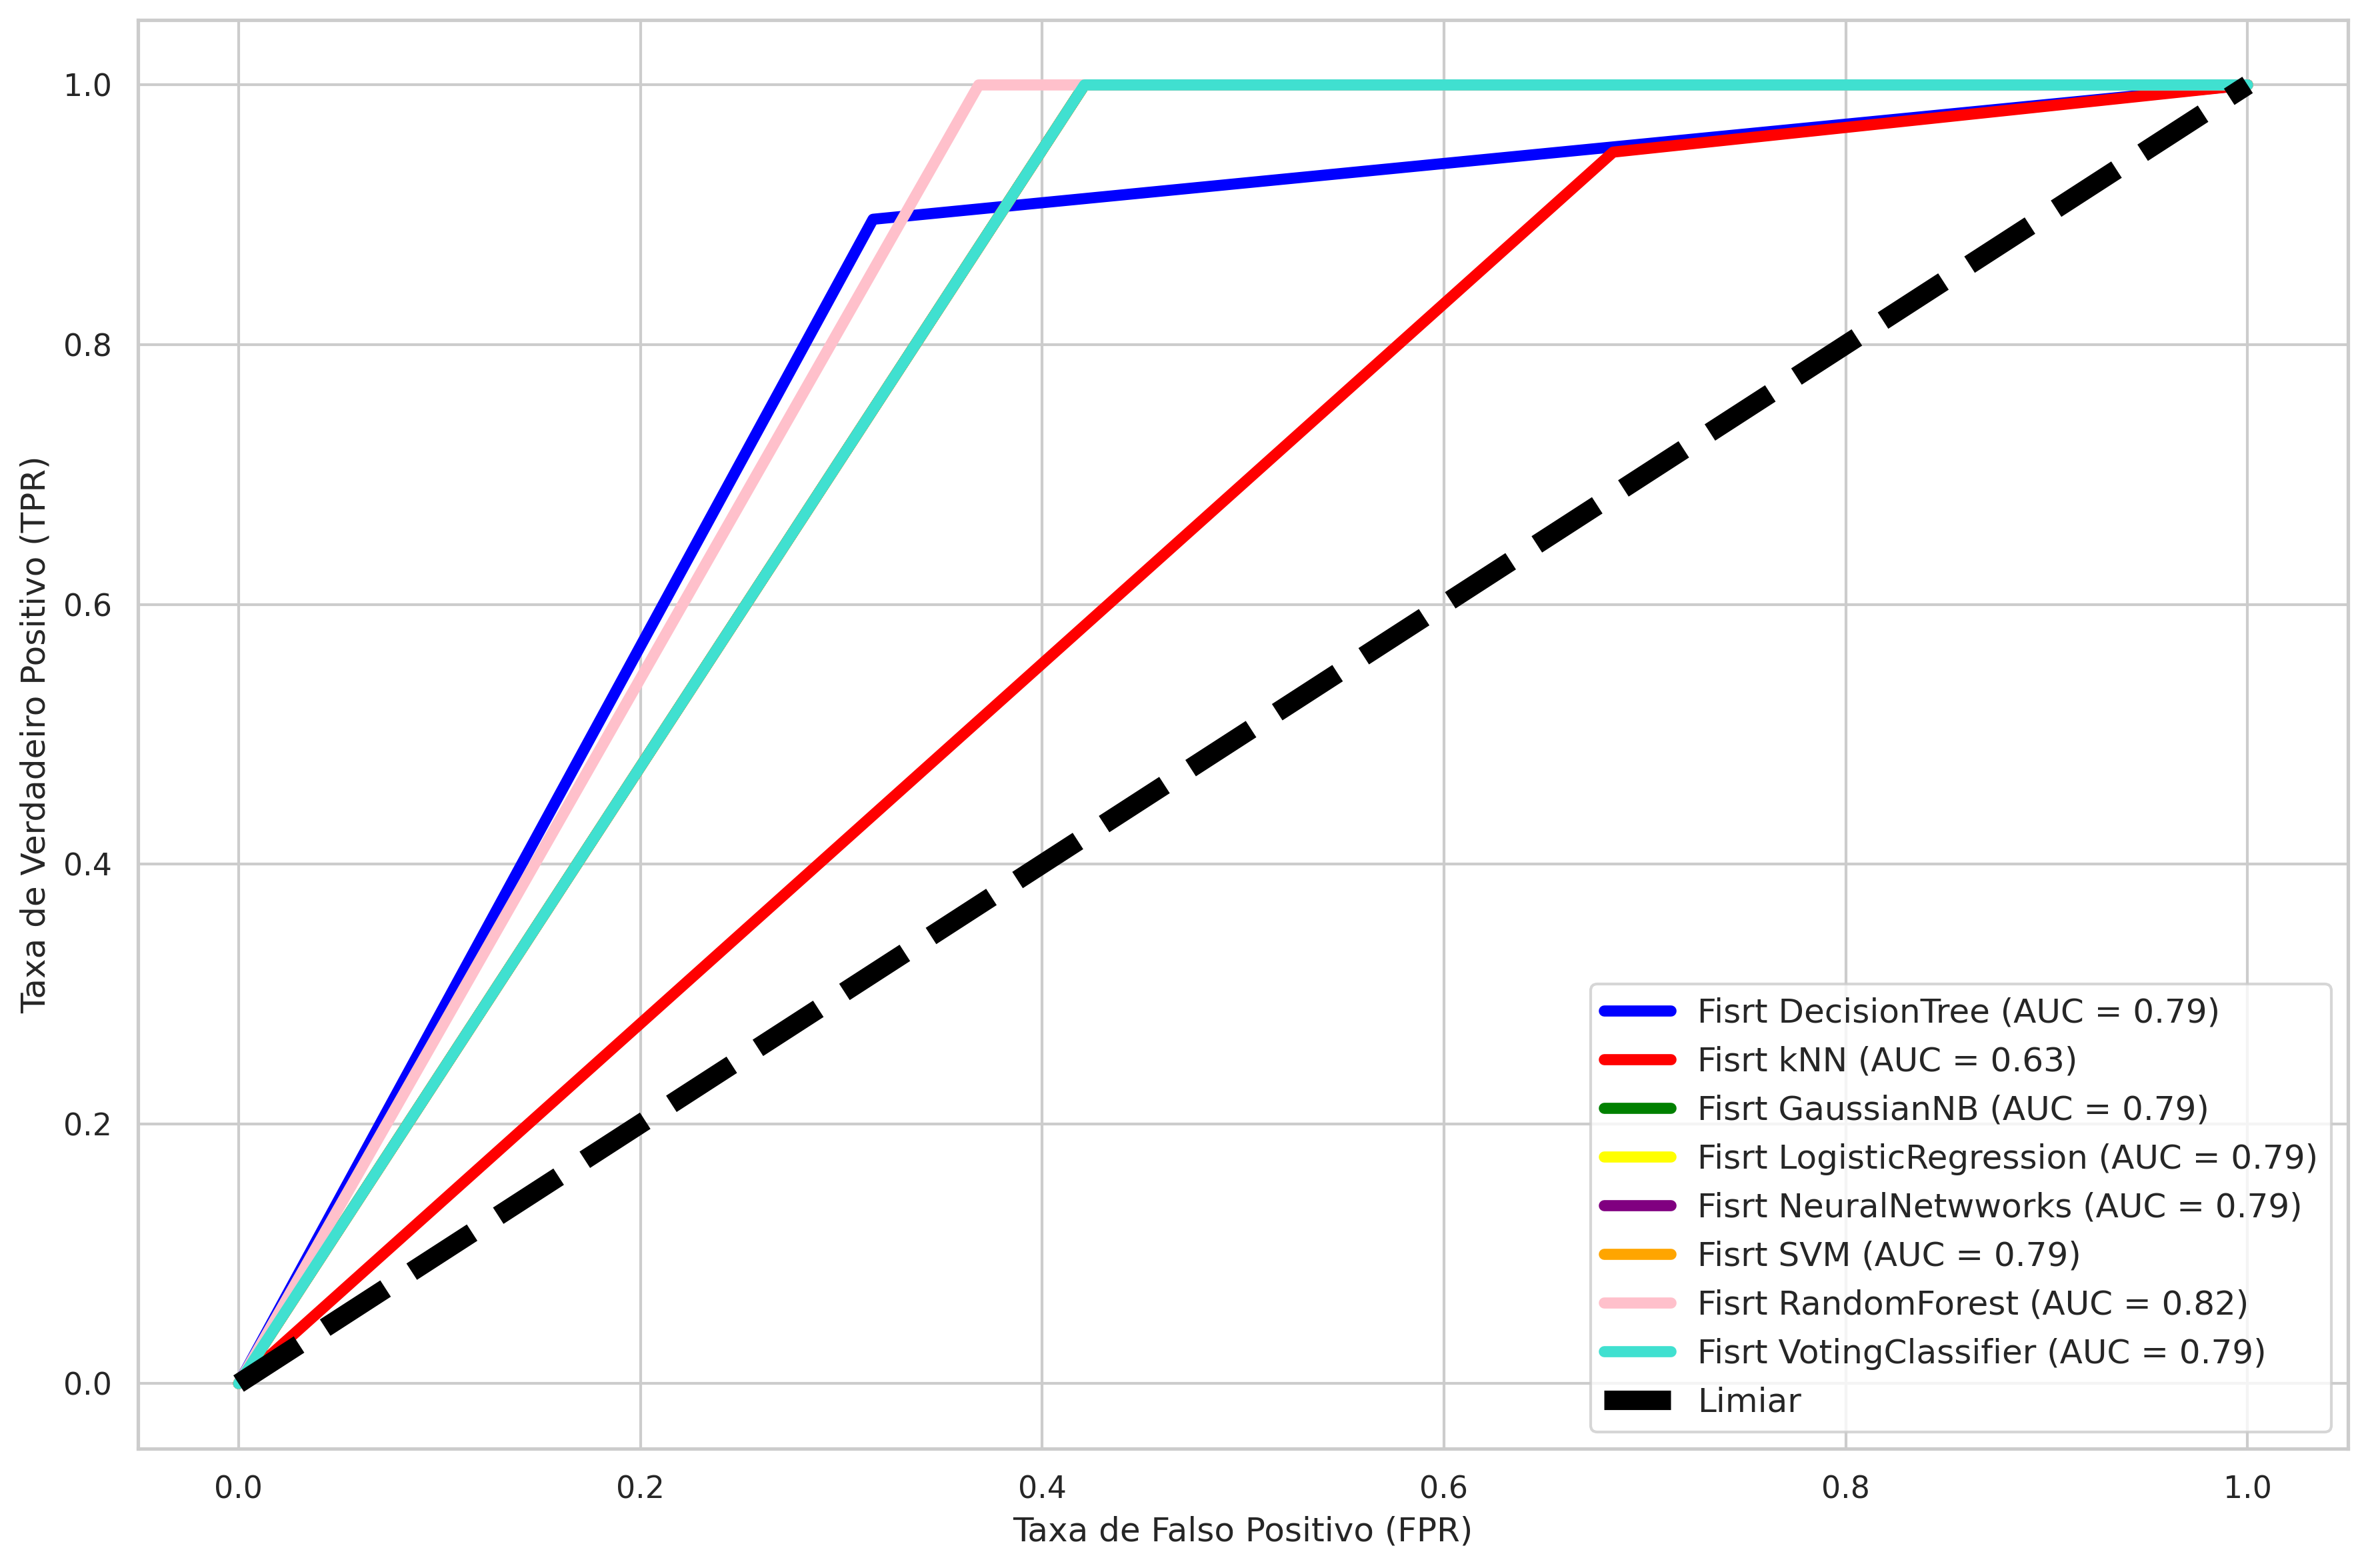

In [ ]:
plt.figure(figsize=(12, 8), dpi=300)

colors = ['blue', 'red', 'green', 'yellow',
          'purple', 'orange', 'pink', 'turquoise']

# Plotar a curva ROC para cada modelo
for model_name, prediction, color in zip(name_classifier, predict_classifier, colors):
  fpr, tpr, _ = roc_curve(y_test, prediction)
  roc_auc = auc(fpr, tpr)

  sns.lineplot(x=fpr, y=tpr, label=f"{model_name} (AUC = {roc_auc:.2f})",
      linestyle="-", linewidth=4, color=color)

sns.lineplot(x=[0, 1], y=[0, 1],
    linestyle="--", label="Limiar",linewidth=7,color="black")

# Configurações do gráfico
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=12)
plt.legend(prop={'size': 12}, loc='lower right')
plt.tight_layout()
plt.savefig('CurvaROC_MI.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

#### Modelos Finais

In [ ]:
name_classifier = ['Last DecisionTree', 'Last kNN', 'Last LogisticRegression',
                   'Last NeuralNetwworks', 'Last SVM', 'Last RandomForest']
predict_classifier = [last_treeP, last_kNNP, last_lgP,
                      last_mlpP, last_svmP, last_randomforestP]

for i, j in zip(name_classifier, predict_classifier):
    # Métricas do classificador
    acuracy = accuracy_score(y_test, j) * 100
    # Printa as informações
    print(f'O classificador de {i}, obteve uma acurácia (exatidão/acerto) de {round(acuracy, 2)}%')

    # Matriz de confusão
    confusion_matrix = pd.DataFrame(cm(y_test, j),
                                    columns=['N (estimado)', 'Y (estimado)'],
                                    index=['N (original)', 'Y (original)'])
    print(confusion_matrix)
    print('--' * 50)

O classificador de Last DecisionTree, obteve uma acurácia (exatidão/acerto) de 92.21%
              N (estimado)  Y (estimado)
N (original)            15             4
Y (original)             2            56
----------------------------------------------------------------------------------------------------
O classificador de Last kNN, obteve uma acurácia (exatidão/acerto) de 87.01%
              N (estimado)  Y (estimado)
N (original)            11             8
Y (original)             2            56
----------------------------------------------------------------------------------------------------
O classificador de Last LogisticRegression, obteve uma acurácia (exatidão/acerto) de 89.61%
              N (estimado)  Y (estimado)
N (original)            11             8
Y (original)             0            58
----------------------------------------------------------------------------------------------------
O classificador de Last NeuralNetwworks, obteve uma acurácia (exatidão/ac

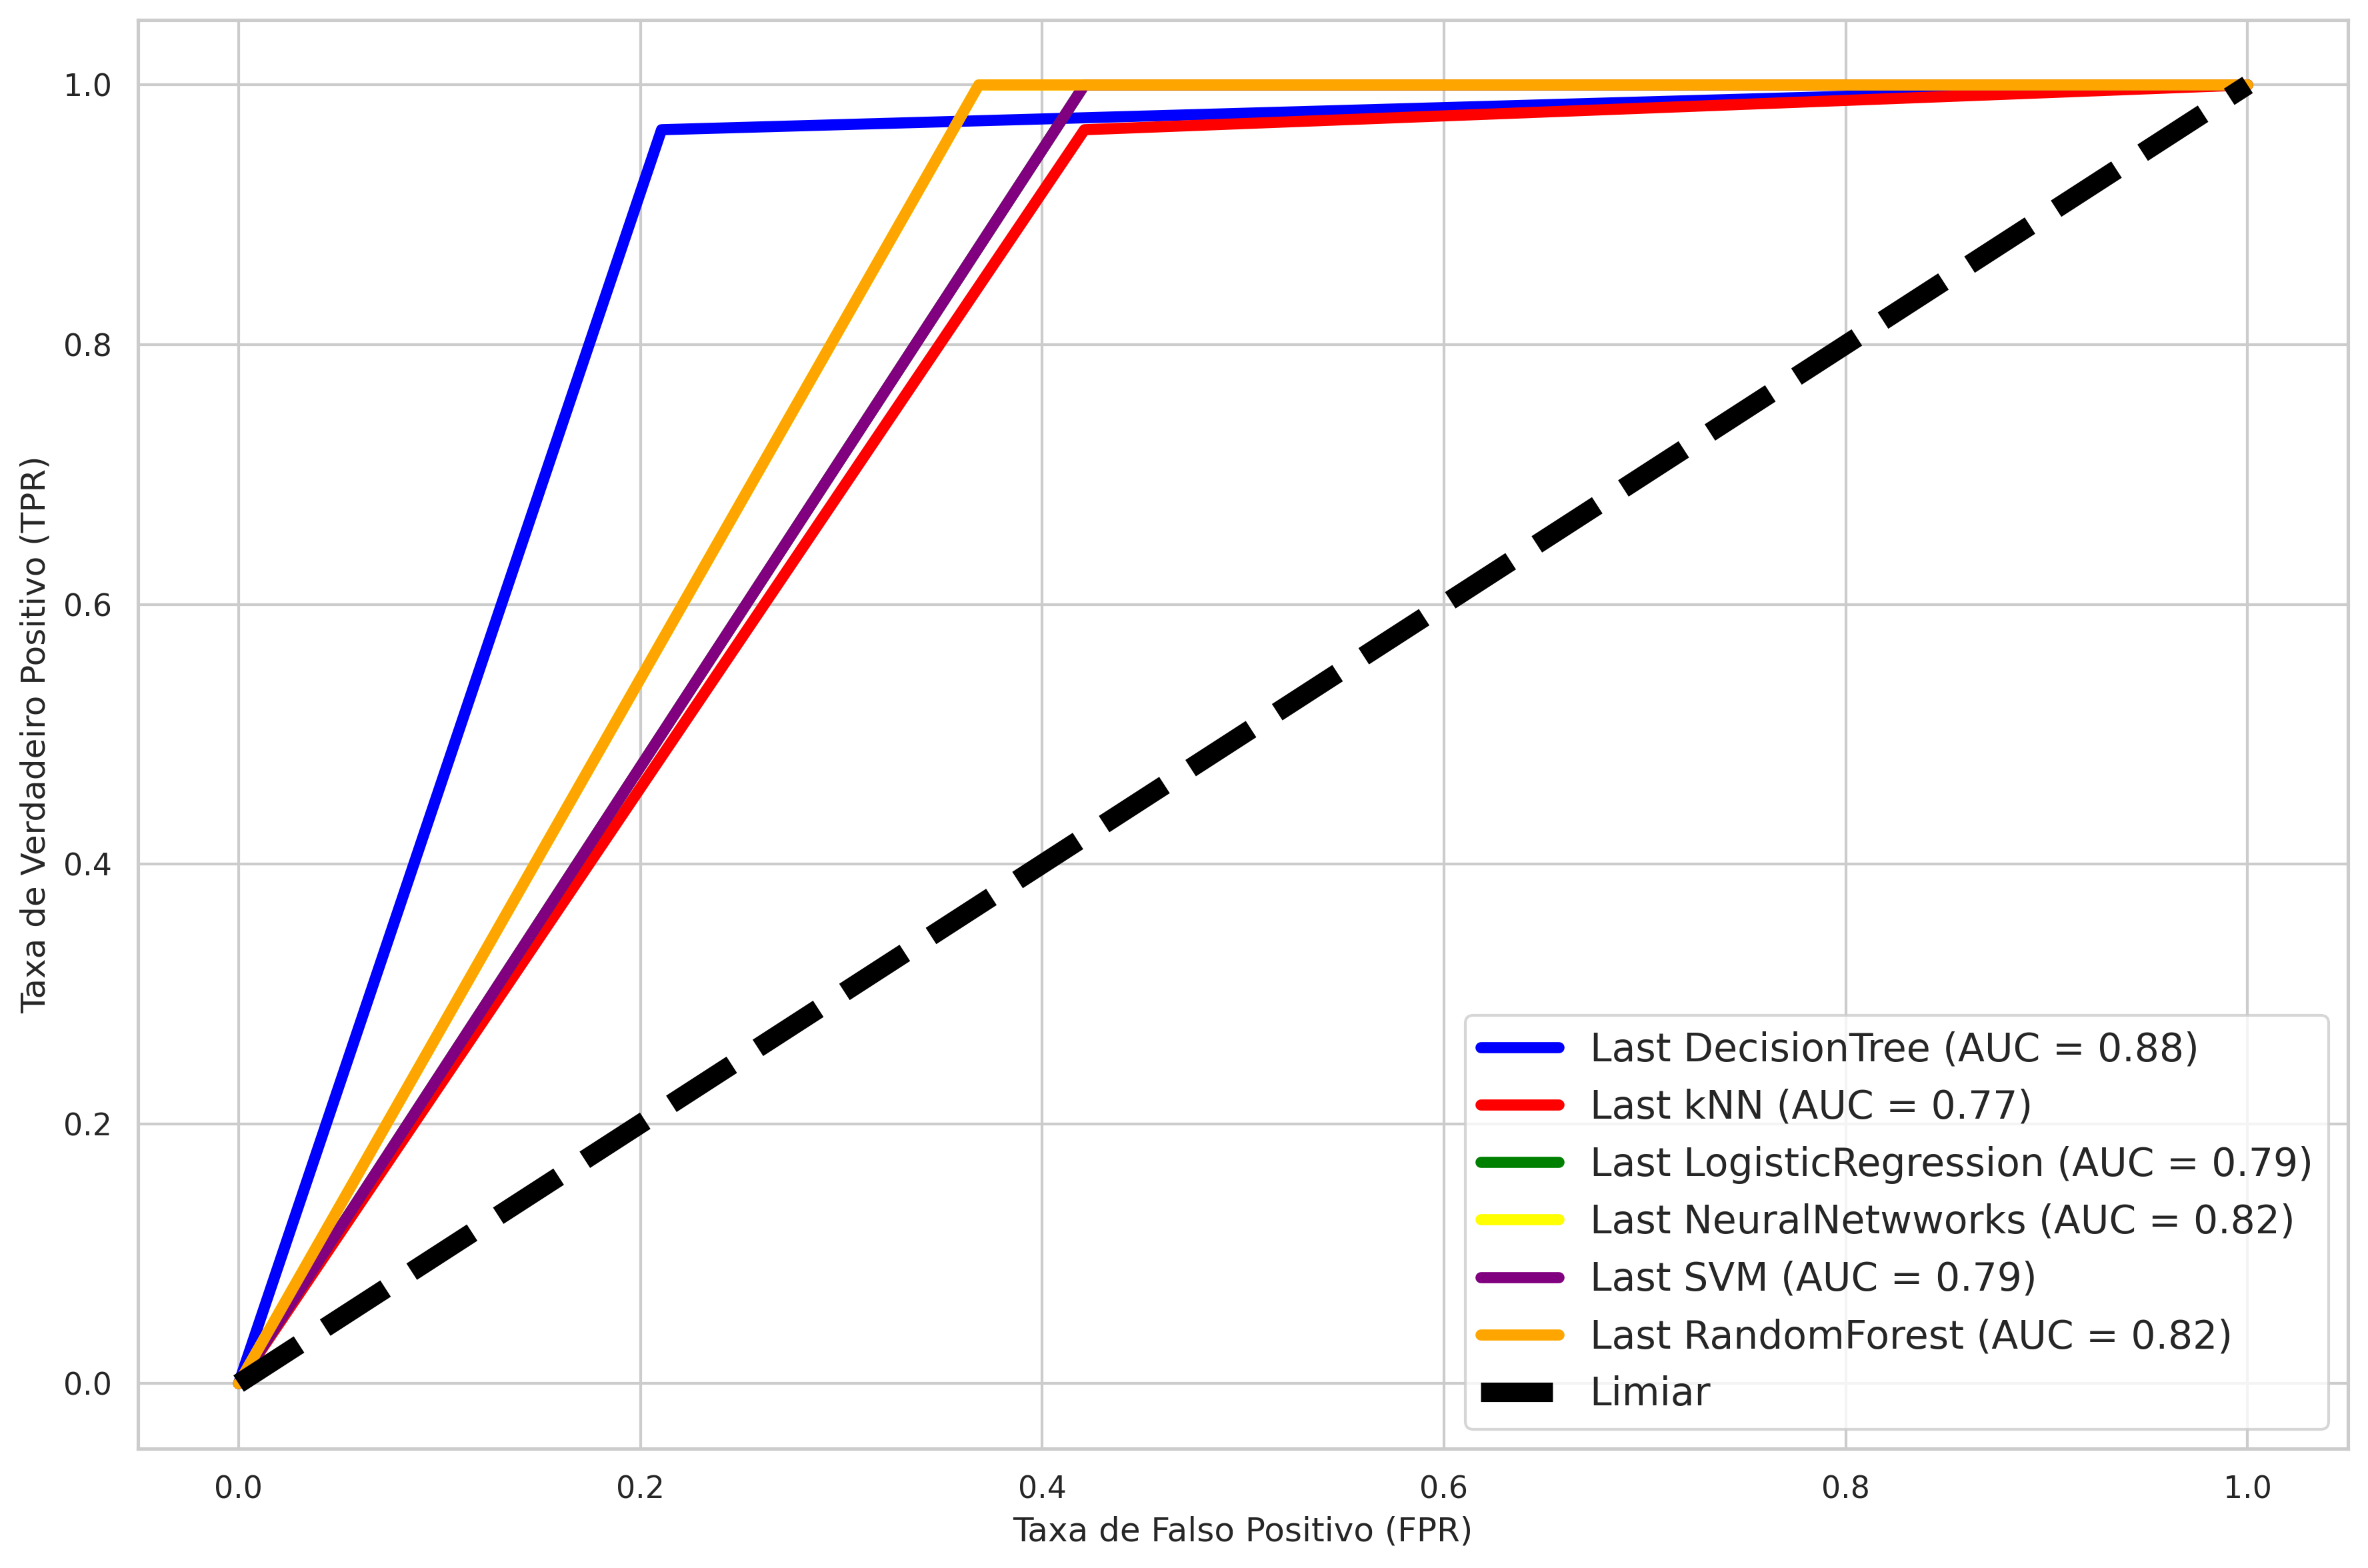

In [ ]:
plt.figure(figsize=(12, 8), dpi=300)

colors = ['blue', 'red', 'green', 'yellow',
          'purple', 'orange']


# Plotar a curva ROC para cada modelo
for model_name, prediction, color in zip(name_classifier, predict_classifier, colors):
  fpr, tpr, _ = roc_curve(y_test, prediction)
  roc_auc = auc(fpr, tpr)

  sns.lineplot(x=fpr, y=tpr, label=f"{model_name} (AUC = {roc_auc:.2f})",
      linestyle="-", linewidth=4, color=color)

sns.lineplot(x=[0, 1], y=[0, 1],
    linestyle="--", label="Limiar",linewidth=7,color="black")

# Configurações do gráfico
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=12)
plt.legend(prop={'size': 14}, loc='lower right')
plt.tight_layout()
plt.savefig('CurvaROC_MF.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

### Avaliação Geral

In [ ]:
name_classifier = ['Fisrt DecisionTree', 'Fisrt kNN', 'Fisrt GaussianNB',
                   'Fisrt NeuralNetwworks', 'Fisrt SVM', 'Fisrt RandomForest',
                   'Fisrt VotingClassifier', 'Last DecisionTree', 'Last kNN',
                   'Last NeuralNetwworks', 'Last SVM', 'Last RandomForest', 'Last VotingClassifier']
predict_classifier = [first_treeP, first_kNNP, first_gnbP, first_mlpP,
                      first_svmP, first_randomforestP, first_votingP,
                      last_treeP, last_kNNP, last_mlpP, last_svmP, last_randomforestP]

for i, j in zip(name_classifier, predict_classifier):
    # Métricas do classificador
    acuracy = accuracy_score(y_test, j) * 100
    # Printa as informações
    print(f'O classificador de {i}, obteve uma acurácia (exatidão/acerto) de {round(acuracy, 2)}%')

    # Matriz de confusão
    confusion_matrix = pd.DataFrame(cm(y_test, first_treeP),
                                    columns=['N (estimado)', 'Y (estimado)'],
                                    index=['N (original)', 'Y (original)'])
    print(confusion_matrix)
    print('--' * 50)

O classificador de Fisrt DecisionTree, obteve uma acurácia (exatidão/acerto) de 84.42%
              N (estimado)  Y (estimado)
N (original)            13             6
Y (original)             6            52
----------------------------------------------------------------------------------------------------
O classificador de Fisrt kNN, obteve uma acurácia (exatidão/acerto) de 79.22%
              N (estimado)  Y (estimado)
N (original)            13             6
Y (original)             6            52
----------------------------------------------------------------------------------------------------
O classificador de Fisrt GaussianNB, obteve uma acurácia (exatidão/acerto) de 89.61%
              N (estimado)  Y (estimado)
N (original)            13             6
Y (original)             6            52
----------------------------------------------------------------------------------------------------
O classificador de Fisrt NeuralNetwworks, obteve uma acurácia (exatidão/acerto

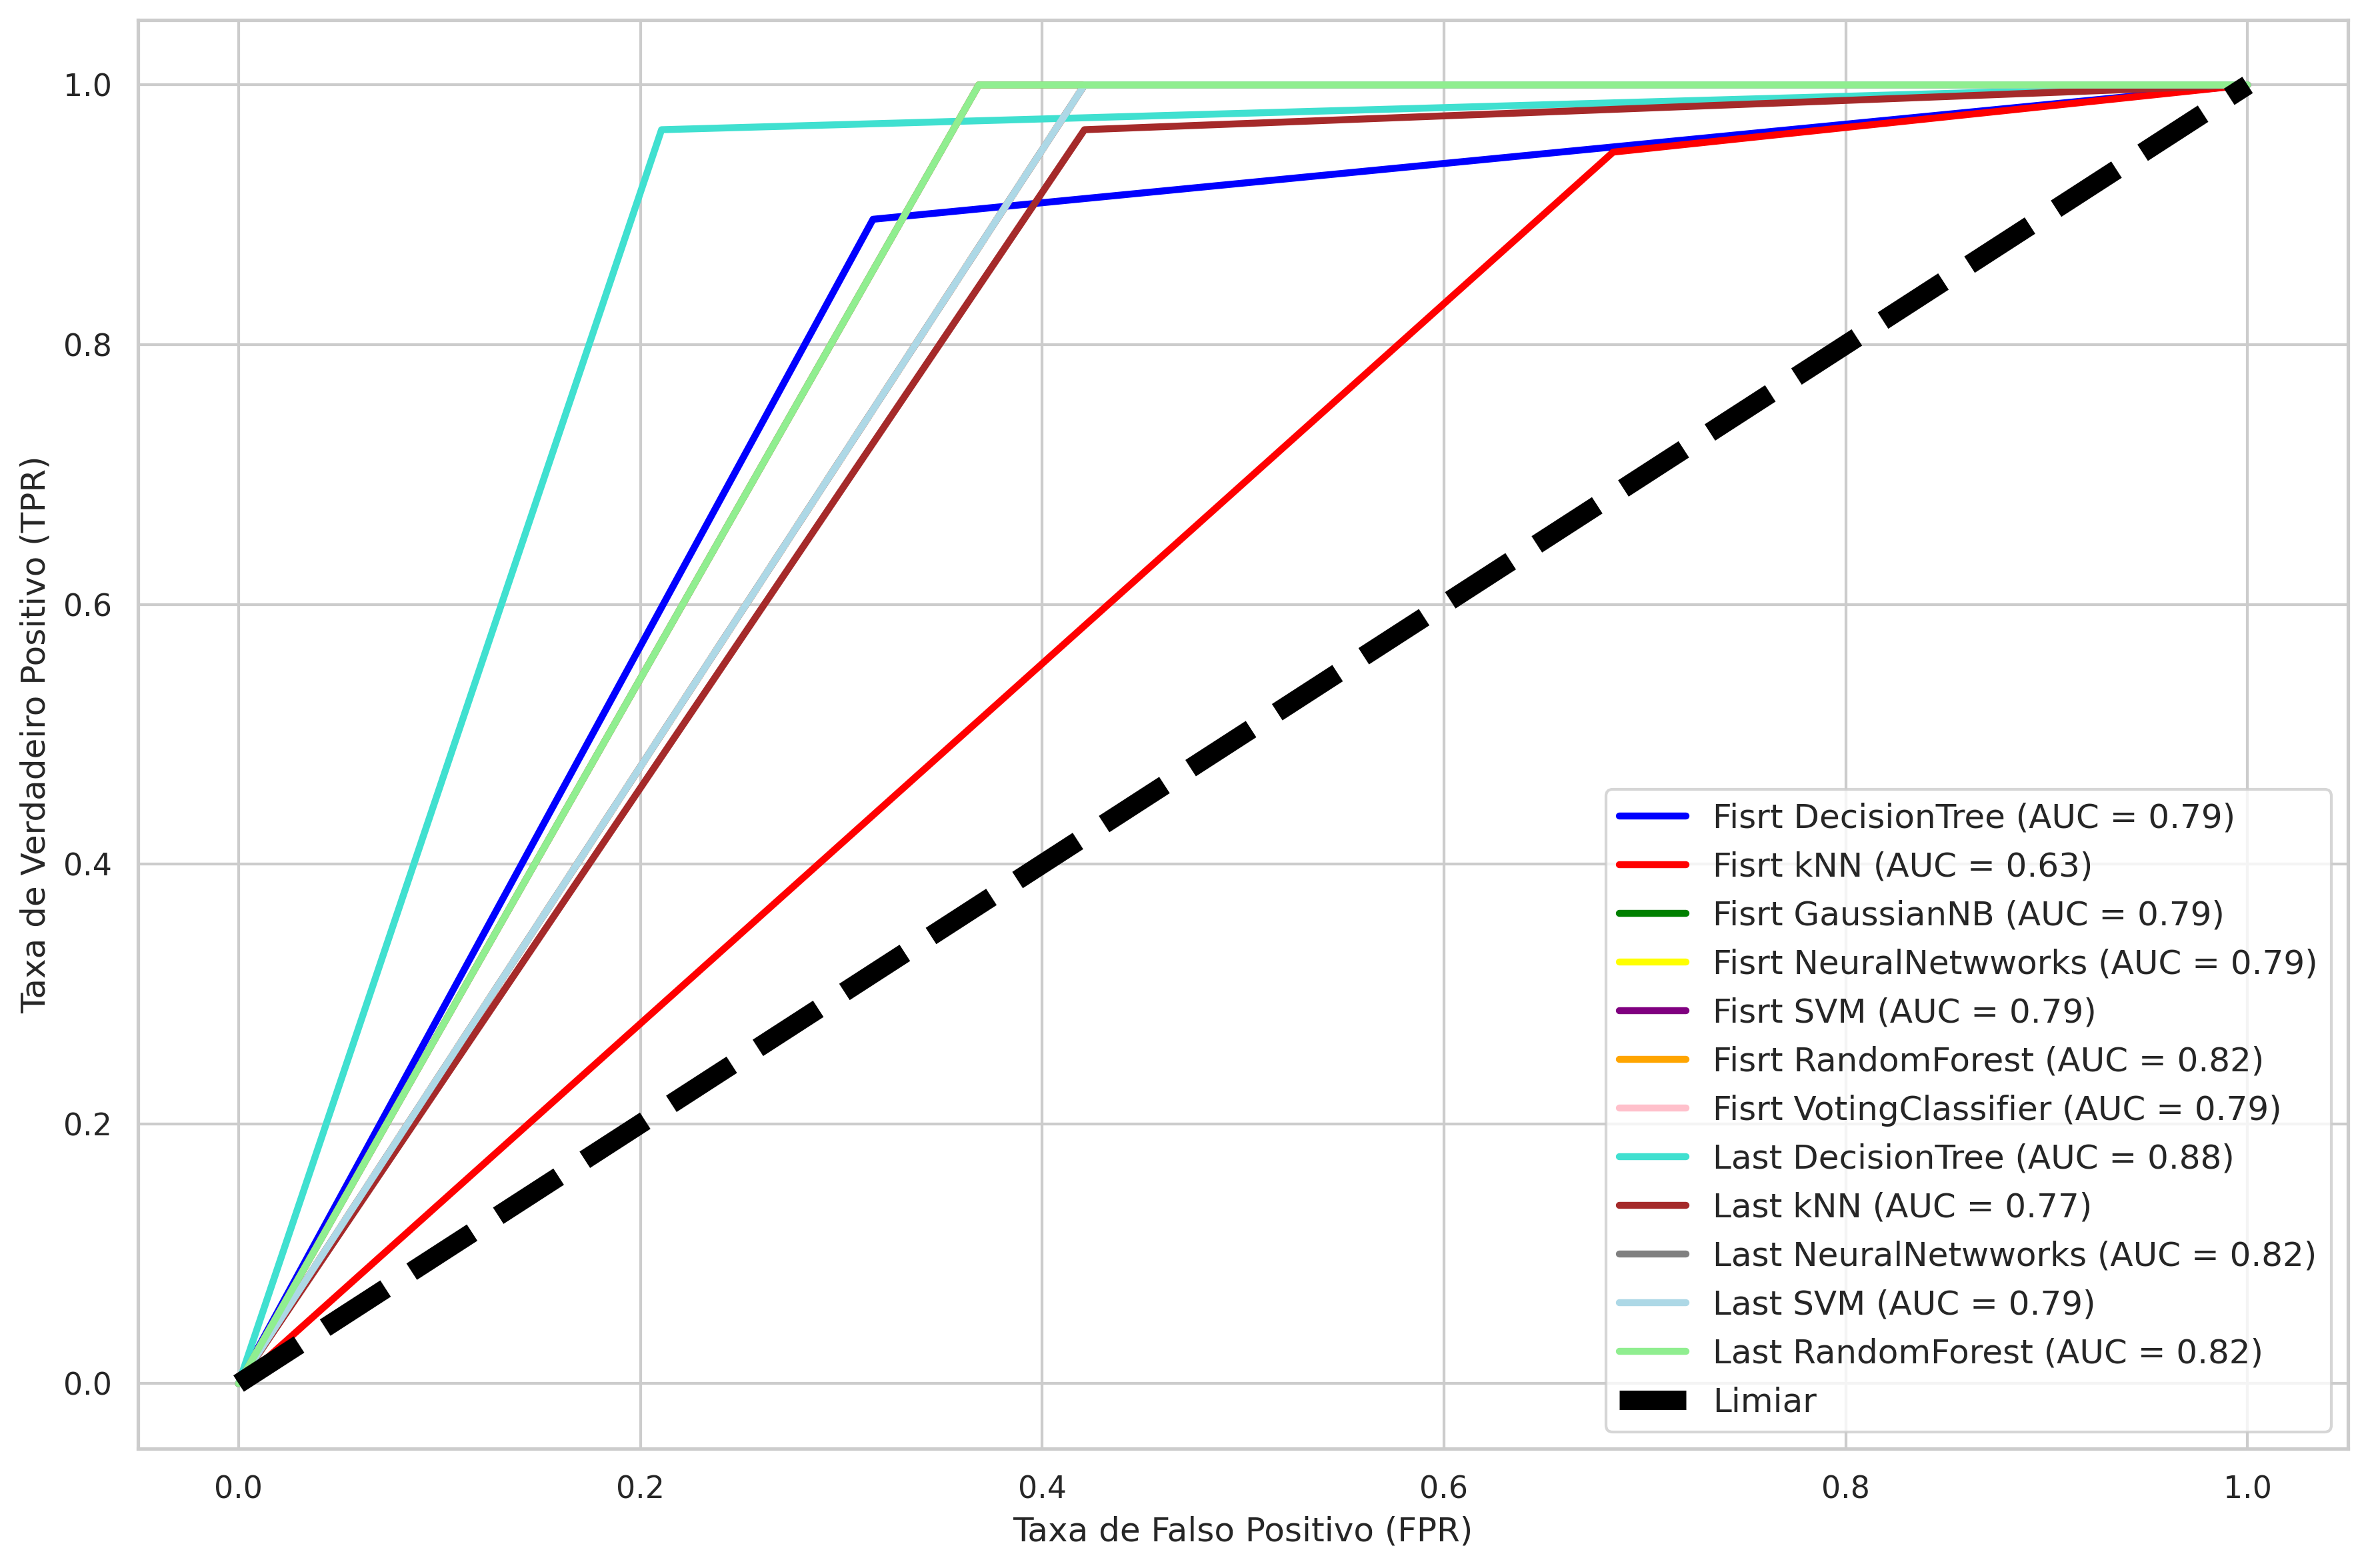

In [ ]:
plt.figure(figsize=(12, 8), dpi=300)

colors = ['blue', 'red', 'green', 'yellow',
          'purple', 'orange', 'pink', 'turquoise',
          'brown', 'gray', 'lightblue',
          'lightgreen', 'violet', 'gold']

# Plotar a curva ROC para cada modelo
for model_name, prediction, color in zip(name_classifier, predict_classifier, colors):
  fpr, tpr, _ = roc_curve(y_test, prediction)
  roc_auc = auc(fpr, tpr)

  sns.lineplot(x=fpr, y=tpr, label=f"{model_name} (AUC = {roc_auc:.2f})",
               linestyle="-", linewidth=2.5, color=color)

sns.lineplot(x=[0, 1], y=[0, 1],
             linestyle="--", label="Limiar",linewidth=7,color="black")

# Configurações do gráfico
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=12)
plt.legend(prop={'size': 12}, loc='lower right')
plt.tight_layout()
plt.savefig('CurvaROC_AG.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()